#Birds Speciees Rocognition:
"A diverse collection of six unique bird species for image classification"


---


Problem selection:

*   Imagine a blind person that want to go to a ornithological parc, to listen to the birds, yes he can listen but does not know which species are there. The point of this "project" is to implement a CNN model and to finetunning it. The model will be able to recognize bird's species taking pictures as input.



In [ ]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


Here we organize the dataset, for being processed later. As the dataset is pretty small, we will do 70% for training, and 15% for validation and test.

In [ ]:
# @title
import os
import shutil
import random
from pathlib import Path

# Chemin d'accès à votre dossier d'images d'oiseaux dans Google Drive
dataset_dir = Path('/content/gdrive/MyDrive/birds/Bird Speciees Dataset')  # Remplacez par le chemin correct

# Créer les dossiers pour train, validation et test
train_dir = dataset_dir / 'train'
val_dir = dataset_dir / 'validation'
test_dir = dataset_dir / 'test'

# Supprimer les dossiers de destination s'ils existent déjà pour éviter le doublement de la séparation
for subset_dir in [train_dir, val_dir, test_dir]:
    if subset_dir.exists():
        shutil.rmtree(subset_dir)
    subset_dir.mkdir(parents=True, exist_ok=True)

# Paramètres de répartition
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Parcourir chaque classe (espèce d'oiseau) dans le dossier principal (exclut train, validation, test)
for bird_class in os.listdir(dataset_dir):
    class_dir = dataset_dir / bird_class
    if class_dir.is_dir() and bird_class not in ['train', 'validation', 'test']:
        # Obtenir toutes les images de cette classe
        images = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.png'))
        random.shuffle(images)

        # Calculer les indices pour division
        train_end = int(train_ratio * len(images))
        val_end = train_end + int(val_ratio * len(images))

        # Diviser les images entre train, validation, et test
        for i, img_path in enumerate(images):
            if i < train_end:
                subset_dir = train_dir / bird_class
            elif i < val_end:
                subset_dir = val_dir / bird_class
            else:
                subset_dir = test_dir / bird_class

            # Créer le sous-dossier pour la classe s'il n'existe pas
            subset_dir.mkdir(parents=True, exist_ok=True)

            # Copier l'image dans le sous-dossier approprié
            shutil.copy(img_path, subset_dir / img_path.name)

print("Séparation terminée !")


Séparation terminée !


Now our data is ready, we will try three different models, and then decide which one to use for the improvment.



```
# Ce texte est au format code
```

#EfficientNetB0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 224, 224  # Taille d'entrée pour EfficientNetB0
num_classes = 6  # Nombre de classes d'oiseaux

# Préparation des générateurs de données avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.


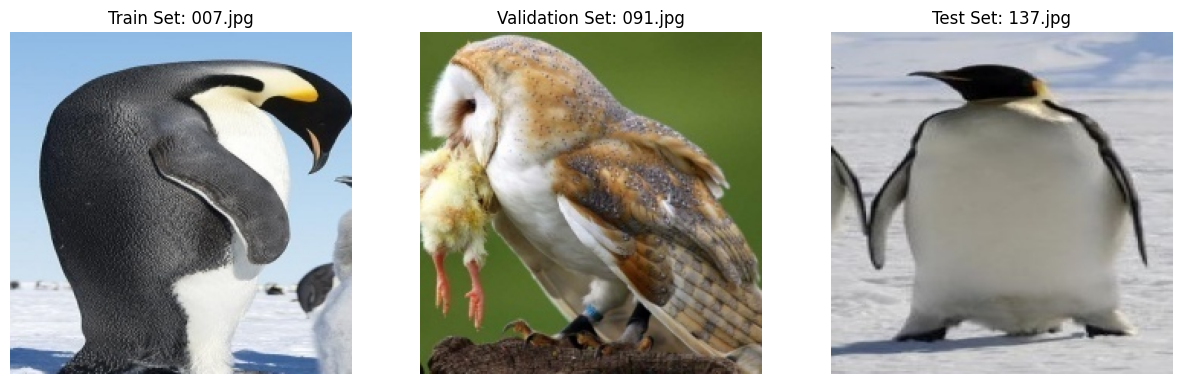

In [ ]:
# @title
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Fonction pour afficher une image aléatoire d'un ensemble donné
def display_random_image_from_directory(directory, title):
    # Sélectionner un sous-dossier aléatoire (classe)
    class_dir = random.choice([os.path.join(directory, d) for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])
    # Sélectionner une image aléatoire dans ce dossier
    image_path = random.choice([os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith(('jpg', 'jpeg', 'png'))])
    # Charger et afficher l'image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"{title}: {os.path.basename(image_path)}")
    plt.axis('off')

# Afficher une image de chaque ensemble
plt.figure(figsize=(15, 5))

# Image du set d'entraînement
plt.subplot(1, 3, 1)
display_random_image_from_directory(train_dir, "Train Set")

# Image du set de validation
plt.subplot(1, 3, 2)
display_random_image_from_directory(val_dir, "Validation Set")

# Image du set de test
plt.subplot(1, 3, 3)
display_random_image_from_directory(test_dir, "Test Set")

plt.show()


#Model A

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.1600 - loss: 1.8147 - val_accuracy: 0.1695 - val_loss: 1.7977
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 49s 350ms/step - accuracy: 0.1840 - loss: 1.7985 - val_accuracy: 0.1695 - val_loss: 1.7918
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.1410 - loss: 1.8002 - val_accuracy: 0.1610 - val_loss: 1.7920
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 290ms/step - accuracy: 0.1569 - loss: 1.7910 - val_accuracy: 0.1780 - val_loss: 1.7917
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 0.1444 - loss: 1.7968 - val_accuracy: 0.1780 - val_loss: 1.7926
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.1742 - loss: 1.7897 - val_accuracy: 0.1610 - val_loss: 1.7922
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.1574 - loss: 1.7937 - val_accuracy: 0.1780 - val_loss: 1.7915
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.1794 - loss: 1.7916 - val_accuracy: 

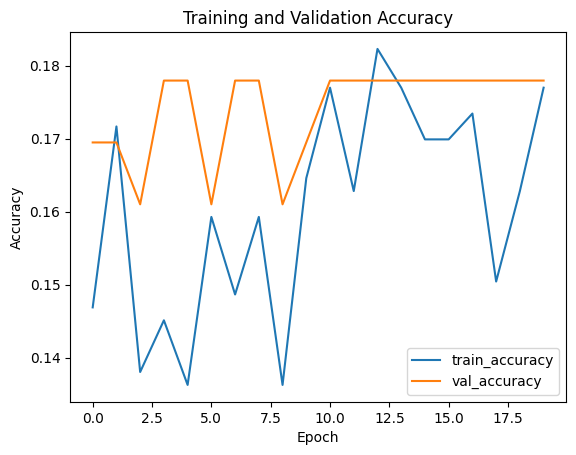

In [ ]:

# Charger le modèle EfficientNetB0 avec des poids pré-entraînés
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)  # Couche de sortie

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=x)

# Geler les couches du modèle de base pour un fine-tuning
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
epochs = 20  # Peut être ajusté pour améliorer la performance
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

# Optionnel : Afficher les courbes d'entraînement
import matplotlib.pyplot as plt

# Afficher l'évolution de la précision
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


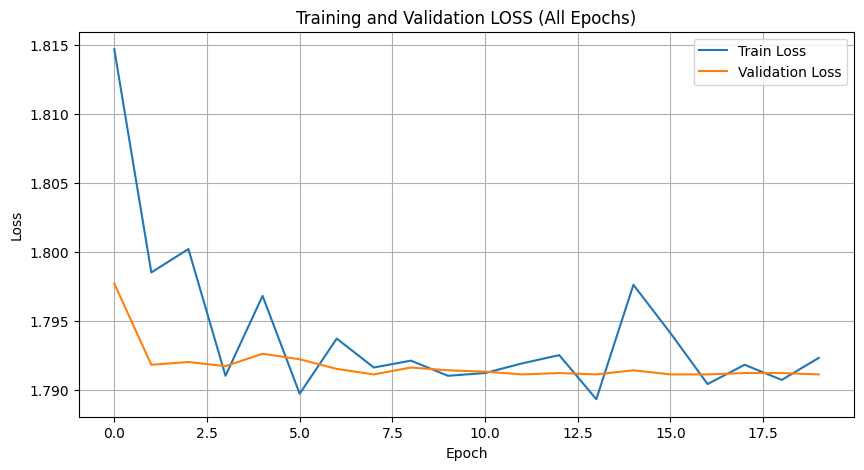

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.1600 - loss: 1.8147 - val_accuracy: 0.1695 - val_loss: 1.7977
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 49s 350ms/step - accuracy: 0.1840 - loss: 1.7985 - val_accuracy: 0.1695 - val_loss: 1.7918
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.1410 - loss: 1.8002 - val_accuracy: 0.1610 - val_loss: 1.7920
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 290ms/step - accuracy: 0.1569 - loss: 1.7910 - val_accuracy: 0.1780 - val_loss: 1.7917
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 0.1444 - loss: 1.7968 - val_accuracy: 0.1780 - val_loss: 1.7926
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.1742 - loss: 1.7897 - val_accuracy: 0.1610 - val_loss: 1.7922
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.1574 - loss: 1.7937 - val_accuracy: 0.1780 - val_loss: 1.7915
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.1794 - loss: 1.7916 - val_accuracy: 0.1780 - val_loss: 1.7911
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - accuracy: 0.1411 - loss: 1.7921 - val_accuracy: 0.1610 - val_loss: 1.7916
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - accuracy: 0.1601 - loss: 1.7910 - val_accuracy: 0.1695 - val_loss: 1.7914
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.1852 - loss: 1.7912 - val_accuracy: 0.1780 - val_loss: 1.7913
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - accuracy: 0.1539 - loss: 1.7919 - val_accuracy: 0.1780 - val_loss: 1.7911
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.1545 - loss: 1.7925 - val_accuracy: 0.1780 - val_loss: 1.7912
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.1860 - loss: 1.7893 - val_accuracy: 0.1780 - val_loss: 1.7911
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.1730 - loss: 1.7976 - val_accuracy: 0.1780 - val_loss: 1.7914
Epoch 16/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.1572 - loss: 1.7941 - val_accuracy: 0.1780 - val_loss: 1.7911
Epoch 17/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 324ms/step - accuracy: 0.1801 - loss: 1.7904 - val_accuracy: 0.1780 - val_loss: 1.7911
Epoch 18/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step - accuracy: 0.1459 - loss: 1.7918 - val_accuracy: 0.1780 - val_loss: 1.7912
Epoch 19/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.1603 - loss: 1.7907 - val_accuracy: 0.1780 - val_loss: 1.7912
Epoch 20/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 311ms/step - accuracy: 0.1726 - loss: 1.7923 - val_accuracy: 0.1780 - val_loss: 1.7911

"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()




#ResNet50
#Model B

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1711 - loss: 2.0266 - val_accuracy: 0.2542 - val_loss: 1.7816
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.2519 - loss: 1.7427 - val_accuracy: 0.3475 - val_loss: 1.5937
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.3281 - loss: 1.5797 - val_accuracy: 0.4407 - val_loss: 1.4252
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.3182 - loss: 1.5501 - val_accuracy: 0.3898 - val_loss: 1.4395
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.4162 - loss: 1.4391 - val_accuracy: 0.4576 - val_loss: 1.3912
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.3863 - loss: 1.5198 - val_accuracy: 0.5593 - val_loss: 1.2772
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.4682 - loss: 1.4522 - val_accuracy: 0.6102 - val_loss: 1.2335
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.4358 - loss: 1.3332 - val_accuracy: 0.5508 -

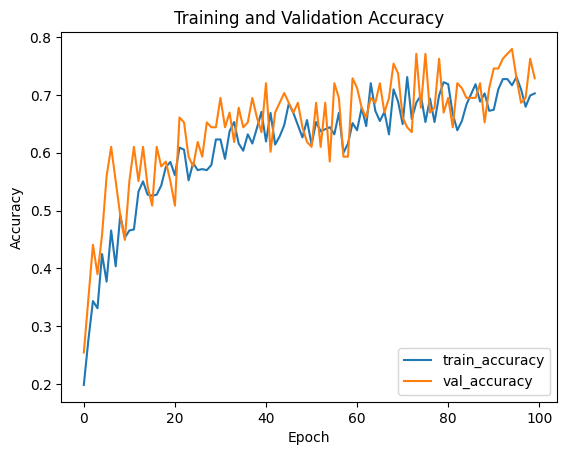

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50  # Utiliser ResNet50, car ResNet18 n'est pas directement disponible dans Keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet50
num_classes = len(os.listdir(train_dir))  # Nombre de classes d'oiseaux

# Préparation des générateurs de données avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Charger le modèle ResNet50 pré-entraîné (utilisé en remplacement de ResNet18)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)  # Couche de sortie

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=output_layer)

# Geler les couches du modèle de base pour un fine-tuning initial
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
epochs = 100  # Peut être ajusté selon les besoins
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
import matplotlib.pyplot as plt

# Afficher l'évolution de la précision
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


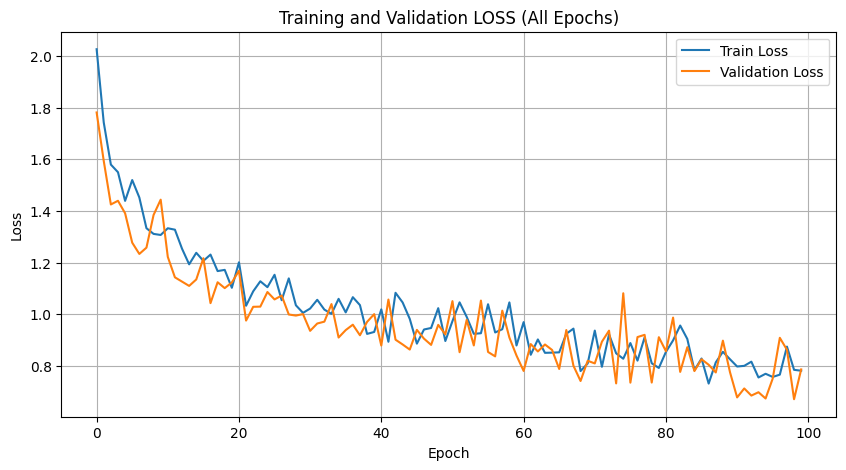

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """


18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1711 - loss: 2.0266 - val_accuracy: 0.2542 - val_loss: 1.7816
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.2519 - loss: 1.7427 - val_accuracy: 0.3475 - val_loss: 1.5937
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.3281 - loss: 1.5797 - val_accuracy: 0.4407 - val_loss: 1.4252
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.3182 - loss: 1.5501 - val_accuracy: 0.3898 - val_loss: 1.4395
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.4162 - loss: 1.4391 - val_accuracy: 0.4576 - val_loss: 1.3912
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.3863 - loss: 1.5198 - val_accuracy: 0.5593 - val_loss: 1.2772
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.4682 - loss: 1.4522 - val_accuracy: 0.6102 - val_loss: 1.2335
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.4358 - loss: 1.3332 - val_accuracy: 0.5508 - val_loss: 1.2579
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.5094 - loss: 1.3112 - val_accuracy: 0.4915 - val_loss: 1.3844
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.4390 - loss: 1.3070 - val_accuracy: 0.4492 - val_loss: 1.4438
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.4785 - loss: 1.3330 - val_accuracy: 0.5508 - val_loss: 1.2221
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.4781 - loss: 1.3275 - val_accuracy: 0.6102 - val_loss: 1.1429
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.5060 - loss: 1.2538 - val_accuracy: 0.5508 - val_loss: 1.1263
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step - accuracy: 0.5539 - loss: 1.1933 - val_accuracy: 0.6102 - val_loss: 1.1097
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.5185 - loss: 1.2380 - val_accuracy: 0.5424 - val_loss: 1.1346
Epoch 16/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.5207 - loss: 1.2067 - val_accuracy: 0.5085 - val_loss: 1.2169
Epoch 17/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.5263 - loss: 1.2310 - val_accuracy: 0.6102 - val_loss: 1.0429
Epoch 18/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.5248 - loss: 1.1671 - val_accuracy: 0.5763 - val_loss: 1.1238
Epoch 19/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.5749 - loss: 1.1718 - val_accuracy: 0.5847 - val_loss: 1.1011
Epoch 20/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 272ms/step - accuracy: 0.6120 - loss: 1.1024 - val_accuracy: 0.5508 - val_loss: 1.1231
Epoch 21/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.5287 - loss: 1.2012 - val_accuracy: 0.5085 - val_loss: 1.1684
Epoch 22/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.6220 - loss: 1.0328 - val_accuracy: 0.6610 - val_loss: 0.9754
Epoch 23/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.5912 - loss: 1.0887 - val_accuracy: 0.6525 - val_loss: 1.0287
Epoch 24/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step - accuracy: 0.5309 - loss: 1.1276 - val_accuracy: 0.5932 - val_loss: 1.0294
Epoch 25/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.5932 - loss: 1.1048 - val_accuracy: 0.5763 - val_loss: 1.0860
Epoch 26/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.5681 - loss: 1.1528 - val_accuracy: 0.6186 - val_loss: 1.0573
Epoch 27/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.5827 - loss: 1.0543 - val_accuracy: 0.5932 - val_loss: 1.0723
Epoch 28/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.5439 - loss: 1.1388 - val_accuracy: 0.6525 - val_loss: 0.9989
Epoch 29/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.6066 - loss: 1.0346 - val_accuracy: 0.6441 - val_loss: 0.9948
Epoch 30/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.6391 - loss: 1.0052 - val_accuracy: 0.6441 - val_loss: 1.0005
Epoch 31/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.6354 - loss: 1.0220 - val_accuracy: 0.6949 - val_loss: 0.9356
Epoch 32/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.5962 - loss: 1.0559 - val_accuracy: 0.6441 - val_loss: 0.9640
Epoch 33/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - accuracy: 0.6132 - loss: 1.0179 - val_accuracy: 0.6695 - val_loss: 0.9712
Epoch 34/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.6597 - loss: 1.0013 - val_accuracy: 0.6186 - val_loss: 1.0393
Epoch 35/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.6040 - loss: 1.0596 - val_accuracy: 0.6780 - val_loss: 0.9097
Epoch 36/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.6037 - loss: 1.0071 - val_accuracy: 0.6441 - val_loss: 0.9385
Epoch 37/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.6151 - loss: 1.0660 - val_accuracy: 0.6525 - val_loss: 0.9594
Epoch 38/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.6189 - loss: 1.0353 - val_accuracy: 0.6949 - val_loss: 0.9185
Epoch 39/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.6602 - loss: 0.9237 - val_accuracy: 0.6610 - val_loss: 0.9703
Epoch 40/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.6724 - loss: 0.9313 - val_accuracy: 0.6356 - val_loss: 1.0003
Epoch 41/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step - accuracy: 0.6041 - loss: 1.0188 - val_accuracy: 0.7203 - val_loss: 0.8786
Epoch 42/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.6901 - loss: 0.8932 - val_accuracy: 0.6017 - val_loss: 1.0568
Epoch 43/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.5927 - loss: 1.0830 - val_accuracy: 0.6695 - val_loss: 0.9013
Epoch 44/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 275ms/step - accuracy: 0.6029 - loss: 1.0455 - val_accuracy: 0.6864 - val_loss: 0.8828
Epoch 45/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.6177 - loss: 0.9819 - val_accuracy: 0.7034 - val_loss: 0.8630
Epoch 46/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.7156 - loss: 0.8860 - val_accuracy: 0.6864 - val_loss: 0.9393
Epoch 47/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.6480 - loss: 0.9408 - val_accuracy: 0.6695 - val_loss: 0.9053
Epoch 48/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.6589 - loss: 0.9467 - val_accuracy: 0.6864 - val_loss: 0.8812
Epoch 49/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.6328 - loss: 1.0234 - val_accuracy: 0.6441 - val_loss: 0.9588
Epoch 50/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.6683 - loss: 0.8962 - val_accuracy: 0.6186 - val_loss: 0.9218
Epoch 51/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.6279 - loss: 0.9733 - val_accuracy: 0.6102 - val_loss: 1.0508
Epoch 52/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.6019 - loss: 1.0460 - val_accuracy: 0.6864 - val_loss: 0.8528
Epoch 53/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.6228 - loss: 0.9898 - val_accuracy: 0.6102 - val_loss: 0.9781
Epoch 54/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.6295 - loss: 0.9241 - val_accuracy: 0.6864 - val_loss: 0.8790
Epoch 55/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.6634 - loss: 0.9263 - val_accuracy: 0.5847 - val_loss: 1.0528
Epoch 56/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.5842 - loss: 1.0387 - val_accuracy: 0.7203 - val_loss: 0.8538
Epoch 57/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - accuracy: 0.6647 - loss: 0.9293 - val_accuracy: 0.6949 - val_loss: 0.8367
Epoch 58/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.6259 - loss: 0.9418 - val_accuracy: 0.5932 - val_loss: 1.0139
Epoch 59/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.5953 - loss: 1.0458 - val_accuracy: 0.5932 - val_loss: 0.9095
Epoch 60/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.6650 - loss: 0.8789 - val_accuracy: 0.7288 - val_loss: 0.8398
Epoch 61/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.6242 - loss: 0.9694 - val_accuracy: 0.7119 - val_loss: 0.7802
Epoch 62/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.6947 - loss: 0.8429 - val_accuracy: 0.6780 - val_loss: 0.8843
Epoch 63/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.6671 - loss: 0.9023 - val_accuracy: 0.6610 - val_loss: 0.8557
Epoch 64/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.7124 - loss: 0.8504 - val_accuracy: 0.6949 - val_loss: 0.8827
Epoch 65/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.6677 - loss: 0.8512 - val_accuracy: 0.6864 - val_loss: 0.8615
Epoch 66/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.6805 - loss: 0.8523 - val_accuracy: 0.7203 - val_loss: 0.7879
Epoch 67/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.6800 - loss: 0.9243 - val_accuracy: 0.6695 - val_loss: 0.9388
Epoch 68/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.6226 - loss: 0.9442 - val_accuracy: 0.6949 - val_loss: 0.8004
Epoch 69/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.7145 - loss: 0.7798 - val_accuracy: 0.7542 - val_loss: 0.7413
Epoch 70/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.7144 - loss: 0.8092 - val_accuracy: 0.7373 - val_loss: 0.8196
Epoch 71/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.6304 - loss: 0.9366 - val_accuracy: 0.6610 - val_loss: 0.8094
Epoch 72/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.7354 - loss: 0.7963 - val_accuracy: 0.6441 - val_loss: 0.8935
Epoch 73/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.6486 - loss: 0.9220 - val_accuracy: 0.6356 - val_loss: 0.9364
Epoch 74/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 272ms/step - accuracy: 0.6849 - loss: 0.8485 - val_accuracy: 0.7712 - val_loss: 0.7320
Epoch 75/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.6961 - loss: 0.8275 - val_accuracy: 0.6780 - val_loss: 1.0812
Epoch 76/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.6734 - loss: 0.8883 - val_accuracy: 0.7712 - val_loss: 0.7349
Epoch 77/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.6911 - loss: 0.8202 - val_accuracy: 0.6695 - val_loss: 0.9115
Epoch 78/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.6708 - loss: 0.9102 - val_accuracy: 0.6780 - val_loss: 0.9201
Epoch 79/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.7163 - loss: 0.8100 - val_accuracy: 0.7627 - val_loss: 0.7353
Epoch 80/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - accuracy: 0.7296 - loss: 0.7918 - val_accuracy: 0.6695 - val_loss: 0.9110
Epoch 81/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.6896 - loss: 0.8543 - val_accuracy: 0.6949 - val_loss: 0.8565
Epoch 82/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.6789 - loss: 0.8986 - val_accuracy: 0.6441 - val_loss: 0.9869
Epoch 83/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - accuracy: 0.6527 - loss: 0.9562 - val_accuracy: 0.7203 - val_loss: 0.7765
Epoch 84/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.6608 - loss: 0.9041 - val_accuracy: 0.7119 - val_loss: 0.8724
Epoch 85/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.7059 - loss: 0.7830 - val_accuracy: 0.6949 - val_loss: 0.7798
Epoch 86/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.7038 - loss: 0.8284 - val_accuracy: 0.6949 - val_loss: 0.8256
Epoch 87/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.7136 - loss: 0.7313 - val_accuracy: 0.6949 - val_loss: 0.8042
Epoch 88/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.7075 - loss: 0.8135 - val_accuracy: 0.7203 - val_loss: 0.7744
Epoch 89/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.6951 - loss: 0.8544 - val_accuracy: 0.6525 - val_loss: 0.8976
Epoch 90/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.6963 - loss: 0.8255 - val_accuracy: 0.7119 - val_loss: 0.7752
Epoch 91/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.7062 - loss: 0.7974 - val_accuracy: 0.7458 - val_loss: 0.6777
Epoch 92/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.7081 - loss: 0.8000 - val_accuracy: 0.7458 - val_loss: 0.7124
Epoch 93/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.6991 - loss: 0.8162 - val_accuracy: 0.7627 - val_loss: 0.6848
Epoch 94/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.7210 - loss: 0.7549 - val_accuracy: 0.7712 - val_loss: 0.6978
Epoch 95/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.7184 - loss: 0.7693 - val_accuracy: 0.7797 - val_loss: 0.6735
Epoch 96/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.7342 - loss: 0.7570 - val_accuracy: 0.7288 - val_loss: 0.7507
Epoch 97/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.7189 - loss: 0.7659 - val_accuracy: 0.6864 - val_loss: 0.9086
Epoch 98/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.6595 - loss: 0.8746 - val_accuracy: 0.6949 - val_loss: 0.8623
Epoch 99/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.7007 - loss: 0.7846 - val_accuracy: 0.7627 - val_loss: 0.6707
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 272ms/step - accuracy: 0.7074 - loss: 0.7811 - val_accuracy: 0.7288 - val_loss: 0.7862
"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()




#InceptionV3

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 299, 299  # Taille d'entrée pour InceptionV3

# Préparation des générateurs de données avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.


Classes détectées :  {'AMERICAN GOLDFINCH': 0, 'BARN OWL': 1, 'CARMINE BEE-EATER': 2, 'DOWNY WOODPECKER': 3, 'EMPEROR PENGUIN': 4, 'FLAMINGO': 5}
Nombre de classes :  6
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.6560 - loss: 1.0447 - val_accuracy: 0.9492 - val_loss: 0.1468
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 458ms/step - accuracy: 1.0000 - loss: 0.0310 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 454ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 450ms/step - accuracy: 0.9958 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 454ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 466ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 7.4668e-04
Epoc

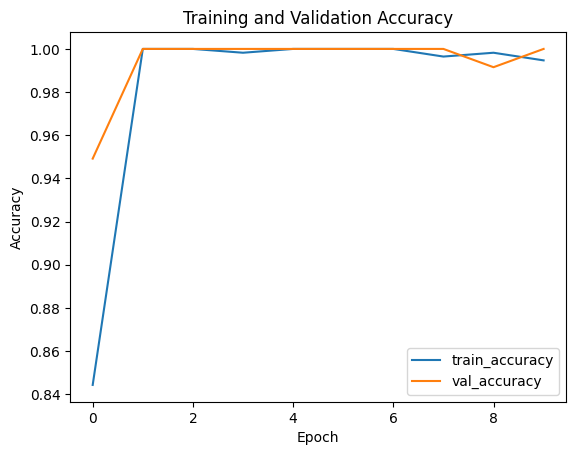

In [ ]:

# Vérification du nombre de classes détectées
print("Classes détectées : ", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print("Nombre de classes : ", num_classes)

# Charger le modèle InceptionV3 pré-entraîné
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches de classification avec Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout pour éviter le surapprentissage
output_layer = Dense(num_classes, activation='softmax')(x)  # Couche de sortie

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=output_layer)

# Dégeler certaines couches pour un fine-tuning plus profond
for layer in base_model.layers[-20:]:  # Dégeler les 20 dernières couches
    layer.trainable = True

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
epochs = 10  # Ajustez si besoin
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
import matplotlib.pyplot as plt

# Afficher l'évolution de la précision
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()




---
We could use the InceptionV3 achitecture but it is already perfect, so we will use the ResNet50n. For the moment we have this results at the 100th epcoh_:


---



*   Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 415ms/step - accuracy: 0.7213 - loss: 0.7908 - val_accuracy: 0.6780 - val_loss: 0.9760
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.6667 - loss: 0.8266
Test accuracy: 65.62%


---




We clearly see a difference betweeen accuracy on training results of ~72% and accuracy on test: ~65.6%. This cis a sign of Overfitting, due to our hyperparamter first selection and the small size of the dataset, our model is momorizing too much and not getting the birds patterns.

For that reason we will use a regularization method, considering also than our dataset is small, we will begin with data augmentation. For the previous model we was already doing it with this setup:

---

    train_datagen = ImageDataGenerator(
        rescale=1.0/255, :Normalizes pixel values ​​to bring them into a range of 0 to 1
        rotation_range=15, :Rotates images randomly within a range of -15 to +15 degrees.
        width_shift_range=0.1, :Randomly shift images horizontally
        height_shift_range=0.1, :Randomly shift images vertically
        shear_range=0.1, :Applies shear distortion to images, distorts the image by skewing its contents horizontally or vertically up to 10%.
        zoom_range=0.1, :Randomly zooms in or out (+/- 10%)
        horizontal_flip=True :Randomly flip images horizontally
    )

This are the new transformation that we will apply, bit more strong and often than the previous one:
---
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=[0.8, 1.2],
        horizontal_flip=True,
        brightness_range=[0.7, 1.3]
    )


From here you will find many implementations of the ResNet50 model, with differents hypermarameters:
---



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50  # Utiliser ResNet50, car ResNet18 n'est pas directement disponible dans Keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet50
num_classes = len(os.listdir(train_dir))  # Nombre de classes d'oiseaux


def add_noise(image):
    img_array = img_to_array(image)
    noise = np.random.normal(loc=0, scale=25, size=img_array.shape)
    img_array = img_array + noise
    img_array = np.clip(img_array, 0, 255)
    return array_to_img(img_array)

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    preprocessing_function=add_noise  # Ajoute du bruit aléatoire
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.


Found 565 images belonging to 6 classes.


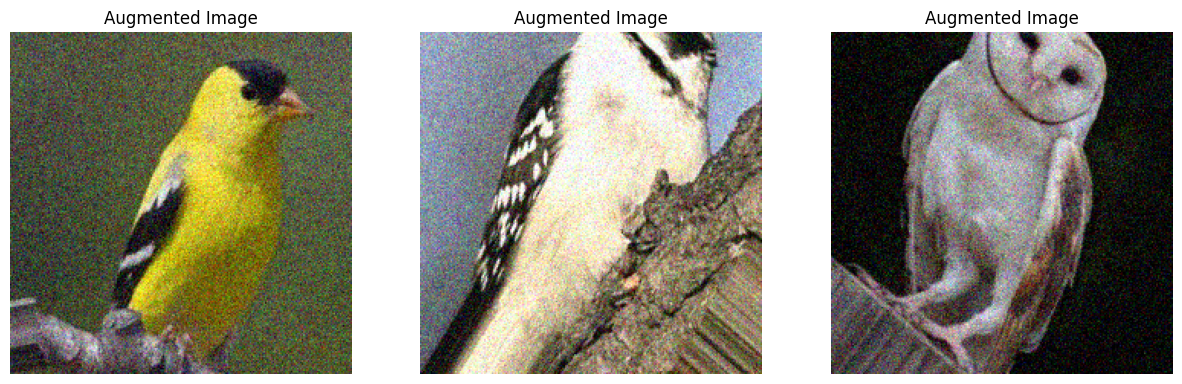

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Fonction de bruit corrigée pour retourner un tableau NumPy
def add_noise(image):
    img_array = img_to_array(image)
    noise = np.random.normal(loc=0, scale=25, size=img_array.shape)
    img_array = img_array + noise
    img_array = np.clip(img_array, 0, 255)
    return img_array  # Retourner le tableau NumPy sans le convertir en image

# Redéfinir l'ImageDataGenerator avec la fonction corrigée
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    preprocessing_function=add_noise
)

# Générer un batch d'images avec data augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Afficher 3 images transformées
images, labels = next(train_generator)
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title("Augmented Image")
plt.show()


#Model C

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 776ms/step - accuracy: 0.1756 - loss: 2.0884 - val_accuracy: 0.2966 - val_loss: 1.6898
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 392ms/step - accuracy: 0.2437 - loss: 1.7483 - val_accuracy: 0.2712 - val_loss: 1.6495
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 411ms/step - accuracy: 0.2910 - loss: 1.6891 - val_accuracy: 0.3136 - val_loss: 1.6005
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 380ms/step - accuracy: 0.3385 - loss: 1.6095 - val_accuracy: 0.4068 - val_loss: 1.5888
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 377ms/step - accuracy: 0.3099 - loss: 1.6051 - val_accuracy: 0.3729 - val_loss: 1.5216
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 378ms/step - accuracy: 0.3311 - loss: 1.6054 - val_accuracy: 0.3983 - val_loss: 1.4778
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 378ms/step - accuracy: 0.3363 - loss: 1.6336 - val_accuracy: 0.3559 - val_loss: 1.6317
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 383ms/step - accuracy: 0.2962 - loss: 1.6503 - val_accuracy: 0.457

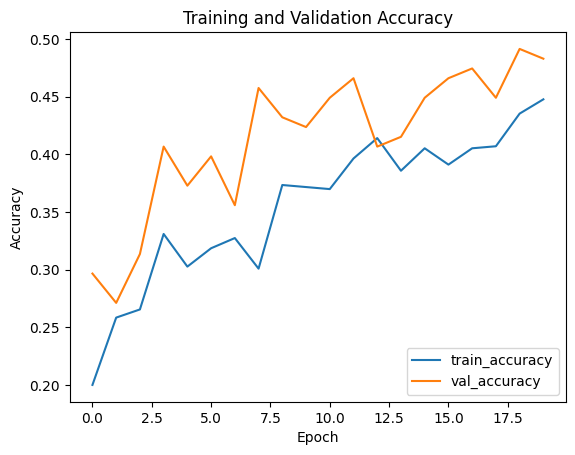

In [ ]:

# Charger le modèle ResNet50 pré-entraîné (utilisé en remplacement de ResNet18)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)  # Couche de sortie

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=output_layer)

# Geler les couches du modèle de base pour un fine-tuning initial
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
epochs = 20  # Peut être ajusté selon les besoins
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
import matplotlib.pyplot as plt

# Afficher l'évolution de la précision
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


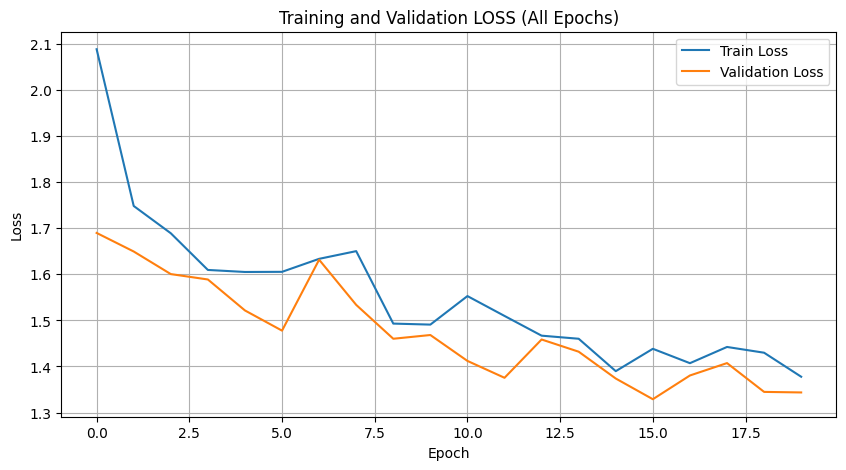

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """

━━━━━━━━━━━━━━━━━━ 27s 776ms/step - accuracy: 0.1756 - loss: 2.0884 - val_accuracy: 0.2966 - val_loss: 1.6898
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 392ms/step - accuracy: 0.2437 - loss: 1.7483 - val_accuracy: 0.2712 - val_loss: 1.6495
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 411ms/step - accuracy: 0.2910 - loss: 1.6891 - val_accuracy: 0.3136 - val_loss: 1.6005
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 380ms/step - accuracy: 0.3385 - loss: 1.6095 - val_accuracy: 0.4068 - val_loss: 1.5888
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 377ms/step - accuracy: 0.3099 - loss: 1.6051 - val_accuracy: 0.3729 - val_loss: 1.5216
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 378ms/step - accuracy: 0.3311 - loss: 1.6054 - val_accuracy: 0.3983 - val_loss: 1.4778
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 378ms/step - accuracy: 0.3363 - loss: 1.6336 - val_accuracy: 0.3559 - val_loss: 1.6317
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 383ms/step - accuracy: 0.2962 - loss: 1.6503 - val_accuracy: 0.4576 - val_loss: 1.5337
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 375ms/step - accuracy: 0.4092 - loss: 1.4931 - val_accuracy: 0.4322 - val_loss: 1.4602
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 377ms/step - accuracy: 0.3743 - loss: 1.4909 - val_accuracy: 0.4237 - val_loss: 1.4683
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 383ms/step - accuracy: 0.3518 - loss: 1.5528 - val_accuracy: 0.4492 - val_loss: 1.4121
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 380ms/step - accuracy: 0.3890 - loss: 1.5097 - val_accuracy: 0.4661 - val_loss: 1.3755
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 394ms/step - accuracy: 0.4129 - loss: 1.4669 - val_accuracy: 0.4068 - val_loss: 1.4586
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 399ms/step - accuracy: 0.4012 - loss: 1.4602 - val_accuracy: 0.4153 - val_loss: 1.4321
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 394ms/step - accuracy: 0.4452 - loss: 1.3899 - val_accuracy: 0.4492 - val_loss: 1.3739
Epoch 16/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 382ms/step - accuracy: 0.3488 - loss: 1.4384 - val_accuracy: 0.4661 - val_loss: 1.3290
Epoch 17/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 388ms/step - accuracy: 0.4141 - loss: 1.4072 - val_accuracy: 0.4746 - val_loss: 1.3805
Epoch 18/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 380ms/step - accuracy: 0.4458 - loss: 1.4424 - val_accuracy: 0.4492 - val_loss: 1.4074
Epoch 19/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - accuracy: 0.4135 - loss: 1.4299 - val_accuracy: 0.4915 - val_loss: 1.3449
Epoch 20/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 380ms/step - accuracy: 0.4664 - loss: 1.3778 - val_accuracy: 0.4831 - val_loss: 1.3437

"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()




Still signs of overfitt, we will add the dropout technique.

#Model D

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 659ms/step - accuracy: 0.1931 - loss: 1.9527 - val_accuracy: 0.3051 - val_loss: 1.7662
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.2317 - loss: 1.7933 - val_accuracy: 0.2712 - val_loss: 1.6056
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.2633 - loss: 1.6862 - val_accuracy: 0.2966 - val_loss: 1.5709
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.2688 - loss: 1.6650 - val_accuracy: 0.3051 - val_loss: 1.5332
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.3574 - loss: 1.6129 - val_accuracy: 0.3305 - val_loss: 1.4817
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.3120 - loss: 1.6328 - val_accuracy: 0.3983 - val_loss: 1.5287
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.3450 - loss: 1.5727 - val_accuracy:

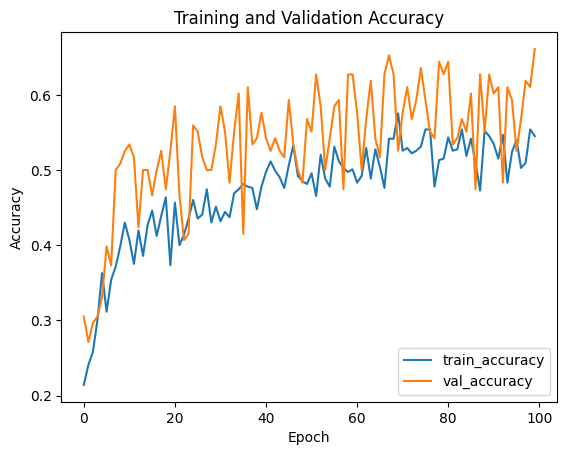

In [ ]:
# @title
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet50
num_classes = len(os.listdir(train_dir))  # Nombre de classes d'oiseaux

# Fonction pour ajouter du bruit aux images
def add_noise(image):
    img_array = img_to_array(image)
    noise = np.random.normal(loc=0, scale=25, size=img_array.shape)
    img_array = img_array + noise
    img_array = np.clip(img_array, 0, 255)
    return img_array  # Retourner un tableau NumPy

# Data Augmentation pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    #preprocessing_function=add_noise  # Ajoute du bruit aléatoire
)

# Data Augmentation pour les ensembles de validation et de test
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Charger le modèle ResNet50 pré-entraîné (utilisé en remplacement de ResNet18)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)  # Couche de sortie

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=output_layer)

# Geler les couches du modèle de base pour un fine-tuning initial
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
epochs = 100  # Peut être ajusté selon les besoins
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


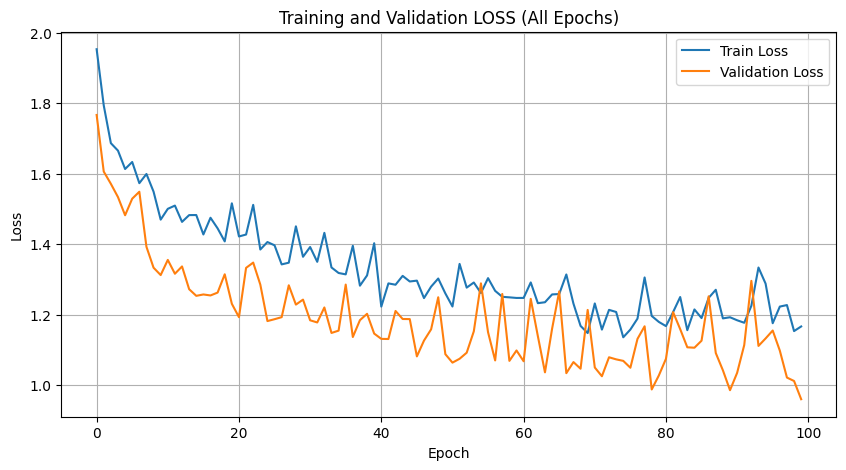

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """
128 images belonging to 6 classes.
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 659ms/step - accuracy: 0.1931 - loss: 1.9527 - val_accuracy: 0.3051 - val_loss: 1.7662
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.2317 - loss: 1.7933 - val_accuracy: 0.2712 - val_loss: 1.6056
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.2633 - loss: 1.6862 - val_accuracy: 0.2966 - val_loss: 1.5709
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.2688 - loss: 1.6650 - val_accuracy: 0.3051 - val_loss: 1.5332
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.3574 - loss: 1.6129 - val_accuracy: 0.3305 - val_loss: 1.4817
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.3120 - loss: 1.6328 - val_accuracy: 0.3983 - val_loss: 1.5287
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.3450 - loss: 1.5727 - val_accuracy: 0.3729 - val_loss: 1.5484
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.3384 - loss: 1.5988 - val_accuracy: 0.5000 - val_loss: 1.3922
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.3330 - loss: 1.5486 - val_accuracy: 0.5085 - val_loss: 1.3329
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - accuracy: 0.4171 - loss: 1.4693 - val_accuracy: 0.5254 - val_loss: 1.3120
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.4013 - loss: 1.4999 - val_accuracy: 0.5339 - val_loss: 1.3550
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.3923 - loss: 1.5091 - val_accuracy: 0.5169 - val_loss: 1.3158
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.4355 - loss: 1.4629 - val_accuracy: 0.4237 - val_loss: 1.3365
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.4230 - loss: 1.4821 - val_accuracy: 0.5000 - val_loss: 1.2719
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.4154 - loss: 1.4823 - val_accuracy: 0.5000 - val_loss: 1.2531
Epoch 16/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.4597 - loss: 1.4272 - val_accuracy: 0.4661 - val_loss: 1.2570
Epoch 17/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.3858 - loss: 1.4746 - val_accuracy: 0.5000 - val_loss: 1.2542
Epoch 18/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.4331 - loss: 1.4445 - val_accuracy: 0.5254 - val_loss: 1.2623
Epoch 19/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.4516 - loss: 1.4075 - val_accuracy: 0.4746 - val_loss: 1.3142
Epoch 20/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.3523 - loss: 1.5156 - val_accuracy: 0.5254 - val_loss: 1.2305
Epoch 21/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.4310 - loss: 1.4215 - val_accuracy: 0.5847 - val_loss: 1.1926
Epoch 22/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.4142 - loss: 1.4270 - val_accuracy: 0.4661 - val_loss: 1.3324
Epoch 23/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.4271 - loss: 1.5112 - val_accuracy: 0.4068 - val_loss: 1.3474
Epoch 24/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.4450 - loss: 1.3845 - val_accuracy: 0.4153 - val_loss: 1.2850
Epoch 25/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.4517 - loss: 1.4057 - val_accuracy: 0.5593 - val_loss: 1.1815
Epoch 26/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - accuracy: 0.4227 - loss: 1.3964 - val_accuracy: 0.5508 - val_loss: 1.1868
Epoch 27/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.4613 - loss: 1.3423 - val_accuracy: 0.5169 - val_loss: 1.1926
Epoch 28/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.4651 - loss: 1.3471 - val_accuracy: 0.5000 - val_loss: 1.2830
Epoch 29/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.4140 - loss: 1.4503 - val_accuracy: 0.5000 - val_loss: 1.2282
Epoch 30/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4574 - loss: 1.3639 - val_accuracy: 0.5339 - val_loss: 1.2424
Epoch 31/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.4133 - loss: 1.3916 - val_accuracy: 0.5847 - val_loss: 1.1837
Epoch 32/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.4571 - loss: 1.3496 - val_accuracy: 0.5508 - val_loss: 1.1776
Epoch 33/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.4001 - loss: 1.4318 - val_accuracy: 0.4831 - val_loss: 1.2201
Epoch 34/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - accuracy: 0.4663 - loss: 1.3336 - val_accuracy: 0.5508 - val_loss: 1.1478
Epoch 35/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.4707 - loss: 1.3179 - val_accuracy: 0.6017 - val_loss: 1.1544
Epoch 36/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.4723 - loss: 1.3140 - val_accuracy: 0.4153 - val_loss: 1.2850
Epoch 37/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.4523 - loss: 1.3951 - val_accuracy: 0.6102 - val_loss: 1.1363
Epoch 38/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.5059 - loss: 1.2819 - val_accuracy: 0.5339 - val_loss: 1.1841
Epoch 39/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.4471 - loss: 1.3110 - val_accuracy: 0.5424 - val_loss: 1.2021
Epoch 40/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - accuracy: 0.4425 - loss: 1.4023 - val_accuracy: 0.5763 - val_loss: 1.1460
Epoch 41/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.4972 - loss: 1.2225 - val_accuracy: 0.5424 - val_loss: 1.1310
Epoch 42/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.4937 - loss: 1.2884 - val_accuracy: 0.5254 - val_loss: 1.1306
Epoch 43/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.4883 - loss: 1.2846 - val_accuracy: 0.5424 - val_loss: 1.2102
Epoch 44/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.4920 - loss: 1.3097 - val_accuracy: 0.5254 - val_loss: 1.1874
Epoch 45/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.4703 - loss: 1.2938 - val_accuracy: 0.5169 - val_loss: 1.1871
Epoch 46/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.4916 - loss: 1.2962 - val_accuracy: 0.5932 - val_loss: 1.0813
Epoch 47/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.5448 - loss: 1.2467 - val_accuracy: 0.5339 - val_loss: 1.1261
Epoch 48/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.5026 - loss: 1.2792 - val_accuracy: 0.5000 - val_loss: 1.1581
Epoch 49/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.4649 - loss: 1.3022 - val_accuracy: 0.4831 - val_loss: 1.2491
Epoch 50/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.4844 - loss: 1.2600 - val_accuracy: 0.5678 - val_loss: 1.0876
Epoch 51/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.5028 - loss: 1.2228 - val_accuracy: 0.5508 - val_loss: 1.0636
Epoch 52/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4831 - loss: 1.3437 - val_accuracy: 0.6271 - val_loss: 1.0745
Epoch 53/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.5019 - loss: 1.2764 - val_accuracy: 0.5847 - val_loss: 1.0918
Epoch 54/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4970 - loss: 1.2909 - val_accuracy: 0.5000 - val_loss: 1.1524
Epoch 55/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.5058 - loss: 1.2611 - val_accuracy: 0.5424 - val_loss: 1.2885
Epoch 56/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.5319 - loss: 1.3033 - val_accuracy: 0.5847 - val_loss: 1.1499
Epoch 57/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - accuracy: 0.4970 - loss: 1.2672 - val_accuracy: 0.5932 - val_loss: 1.0698
Epoch 58/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.5160 - loss: 1.2503 - val_accuracy: 0.4746 - val_loss: 1.2584
Epoch 59/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.5007 - loss: 1.2488 - val_accuracy: 0.6271 - val_loss: 1.0686
Epoch 60/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.5113 - loss: 1.2471 - val_accuracy: 0.6271 - val_loss: 1.0981
Epoch 61/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.4914 - loss: 1.2472 - val_accuracy: 0.5763 - val_loss: 1.0675
Epoch 62/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.5226 - loss: 1.2911 - val_accuracy: 0.5000 - val_loss: 1.2445
Epoch 63/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.5383 - loss: 1.2323 - val_accuracy: 0.5678 - val_loss: 1.1388
Epoch 64/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.4796 - loss: 1.2349 - val_accuracy: 0.6186 - val_loss: 1.0360
Epoch 65/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.5131 - loss: 1.2571 - val_accuracy: 0.5424 - val_loss: 1.1598
Epoch 66/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.5325 - loss: 1.2582 - val_accuracy: 0.5169 - val_loss: 1.2657
Epoch 67/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.4693 - loss: 1.3137 - val_accuracy: 0.6271 - val_loss: 1.0337
Epoch 68/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.5127 - loss: 1.2311 - val_accuracy: 0.6525 - val_loss: 1.0652
Epoch 69/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.5390 - loss: 1.1678 - val_accuracy: 0.6271 - val_loss: 1.0463
Epoch 70/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.5716 - loss: 1.1475 - val_accuracy: 0.5254 - val_loss: 1.2131
Epoch 71/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.5312 - loss: 1.2315 - val_accuracy: 0.5763 - val_loss: 1.0498
Epoch 72/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.5520 - loss: 1.1573 - val_accuracy: 0.6102 - val_loss: 1.0250
Epoch 73/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.5439 - loss: 1.2133 - val_accuracy: 0.5678 - val_loss: 1.0788
Epoch 74/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.5359 - loss: 1.2073 - val_accuracy: 0.5932 - val_loss: 1.0729
Epoch 75/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.5963 - loss: 1.1355 - val_accuracy: 0.6356 - val_loss: 1.0686
Epoch 76/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.5531 - loss: 1.1575 - val_accuracy: 0.5932 - val_loss: 1.0491
Epoch 77/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.5538 - loss: 1.1885 - val_accuracy: 0.5508 - val_loss: 1.1310
Epoch 78/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.4543 - loss: 1.3053 - val_accuracy: 0.5424 - val_loss: 1.1667
Epoch 79/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.4969 - loss: 1.1960 - val_accuracy: 0.6441 - val_loss: 0.9875
Epoch 80/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.5267 - loss: 1.1791 - val_accuracy: 0.6271 - val_loss: 1.0272
Epoch 81/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.5553 - loss: 1.1672 - val_accuracy: 0.6441 - val_loss: 1.0745
Epoch 82/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.5052 - loss: 1.2068 - val_accuracy: 0.5339 - val_loss: 1.2069
Epoch 83/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 292ms/step - accuracy: 0.4955 - loss: 1.2497 - val_accuracy: 0.5424 - val_loss: 1.1586
Epoch 84/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.5805 - loss: 1.1557 - val_accuracy: 0.5678 - val_loss: 1.1071
Epoch 85/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.5045 - loss: 1.2145 - val_accuracy: 0.5508 - val_loss: 1.1059
Epoch 86/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.5489 - loss: 1.1900 - val_accuracy: 0.6017 - val_loss: 1.1258
Epoch 87/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.5056 - loss: 1.2473 - val_accuracy: 0.4746 - val_loss: 1.2517
Epoch 88/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.4801 - loss: 1.2703 - val_accuracy: 0.6271 - val_loss: 1.0909
Epoch 89/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.5473 - loss: 1.1891 - val_accuracy: 0.5508 - val_loss: 1.0419
Epoch 90/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.5358 - loss: 1.1923 - val_accuracy: 0.6271 - val_loss: 0.9854
Epoch 91/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.5461 - loss: 1.1838 - val_accuracy: 0.6017 - val_loss: 1.0346
Epoch 92/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - accuracy: 0.5430 - loss: 1.1767 - val_accuracy: 0.6102 - val_loss: 1.1135
Epoch 93/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.5109 - loss: 1.2248 - val_accuracy: 0.4831 - val_loss: 1.2956
Epoch 94/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.4583 - loss: 1.3334 - val_accuracy: 0.6102 - val_loss: 1.1110
Epoch 95/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4926 - loss: 1.2877 - val_accuracy: 0.5932 - val_loss: 1.1322
Epoch 96/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.5579 - loss: 1.1754 - val_accuracy: 0.5254 - val_loss: 1.1547
Epoch 97/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.5121 - loss: 1.2226 - val_accuracy: 0.5678 - val_loss: 1.0976
Epoch 98/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.5148 - loss: 1.2269 - val_accuracy: 0.6186 - val_loss: 1.0212
Epoch 99/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.5528 - loss: 1.1531 - val_accuracy: 0.6102 - val_loss: 1.0115
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.5291 - loss: 1.1662 - val_accuracy: 0.6610 - val_loss: 0.9598


"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()




#Model E

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 718ms/step - accuracy: 0.1820 - loss: 2.1554 - val_accuracy: 0.1695 - val_loss: 1.7385
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.2022 - loss: 1.9121 - val_accuracy: 0.2373 - val_loss: 1.7097
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.2501 - loss: 1.7717 - val_accuracy: 0.3390 - val_loss: 1.6495
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.2865 - loss: 1.7163 - val_accuracy: 0.3051 - val_loss: 1.6255
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.3221 - loss: 1.6611 - val_accuracy: 0.2966 - val_loss: 1.6127
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.2838 - loss: 1.6941 - val_accuracy: 0.4068 - val_loss: 1.5888
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.2798 - loss: 1.6868 - val_accuracy:

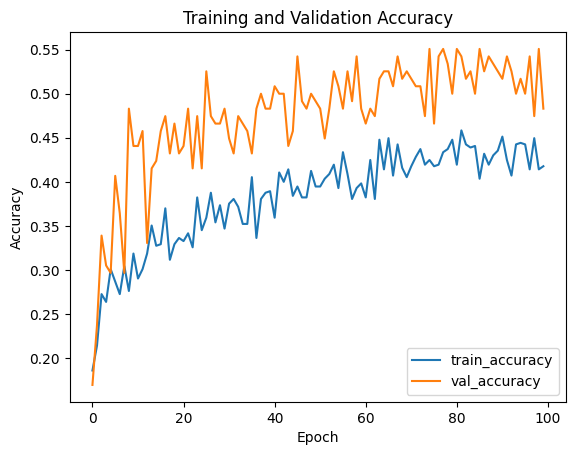

In [ ]:
# @title
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet50
num_classes = len(os.listdir(train_dir))  # Nombre de classes d'oiseaux

# Data Augmentation pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
)

# Data Augmentation pour les ensembles de validation et de test
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Charger le modèle ResNet50 pré-entraîné
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches de classification avec Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout pour éviter le surapprentissage
output_layer = Dense(num_classes, activation='softmax')(x)

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=output_layer)

# Geler les couches du modèle de base pour un fine-tuning initial
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
epochs = 100  # Peut être ajusté selon les besoins
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


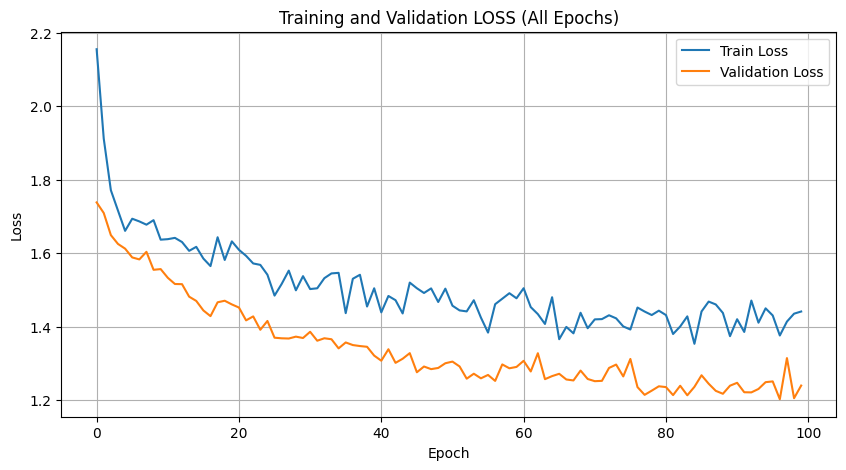

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """
━━━━━━━ 26s 718ms/step - accuracy: 0.1820 - loss: 2.1554 - val_accuracy: 0.1695 - val_loss: 1.7385
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.2022 - loss: 1.9121 - val_accuracy: 0.2373 - val_loss: 1.7097
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.2501 - loss: 1.7717 - val_accuracy: 0.3390 - val_loss: 1.6495
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.2865 - loss: 1.7163 - val_accuracy: 0.3051 - val_loss: 1.6255
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.3221 - loss: 1.6611 - val_accuracy: 0.2966 - val_loss: 1.6127
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.2838 - loss: 1.6941 - val_accuracy: 0.4068 - val_loss: 1.5888
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.2798 - loss: 1.6868 - val_accuracy: 0.3644 - val_loss: 1.5834
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.3061 - loss: 1.6779 - val_accuracy: 0.2966 - val_loss: 1.6040
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.2865 - loss: 1.6902 - val_accuracy: 0.4831 - val_loss: 1.5551
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.3305 - loss: 1.6371 - val_accuracy: 0.4407 - val_loss: 1.5570
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.3015 - loss: 1.6385 - val_accuracy: 0.4407 - val_loss: 1.5334
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.2764 - loss: 1.6420 - val_accuracy: 0.4576 - val_loss: 1.5165
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 287ms/step - accuracy: 0.3198 - loss: 1.6307 - val_accuracy: 0.3305 - val_loss: 1.5160
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.3409 - loss: 1.6067 - val_accuracy: 0.4153 - val_loss: 1.4820
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.3437 - loss: 1.6176 - val_accuracy: 0.4237 - val_loss: 1.4704
Epoch 16/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.3271 - loss: 1.5857 - val_accuracy: 0.4576 - val_loss: 1.4445
Epoch 17/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.3693 - loss: 1.5652 - val_accuracy: 0.4746 - val_loss: 1.4290
Epoch 18/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.2748 - loss: 1.6437 - val_accuracy: 0.4322 - val_loss: 1.4667
Epoch 19/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step - accuracy: 0.3355 - loss: 1.5819 - val_accuracy: 0.4661 - val_loss: 1.4709
Epoch 20/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.3185 - loss: 1.6325 - val_accuracy: 0.4322 - val_loss: 1.4609
Epoch 21/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.3142 - loss: 1.6095 - val_accuracy: 0.4407 - val_loss: 1.4524
Epoch 22/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.3506 - loss: 1.5931 - val_accuracy: 0.4831 - val_loss: 1.4175
Epoch 23/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.3125 - loss: 1.5724 - val_accuracy: 0.4153 - val_loss: 1.4283
Epoch 24/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.3696 - loss: 1.5685 - val_accuracy: 0.4746 - val_loss: 1.3919
Epoch 25/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.3339 - loss: 1.5417 - val_accuracy: 0.4153 - val_loss: 1.4159
Epoch 26/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.4073 - loss: 1.4849 - val_accuracy: 0.5254 - val_loss: 1.3703
Epoch 27/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.4076 - loss: 1.5166 - val_accuracy: 0.4746 - val_loss: 1.3687
Epoch 28/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.3485 - loss: 1.5529 - val_accuracy: 0.4661 - val_loss: 1.3681
Epoch 29/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.3764 - loss: 1.4993 - val_accuracy: 0.4661 - val_loss: 1.3732
Epoch 30/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.3390 - loss: 1.5378 - val_accuracy: 0.4831 - val_loss: 1.3695
Epoch 31/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.3950 - loss: 1.5027 - val_accuracy: 0.4492 - val_loss: 1.3864
Epoch 32/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.4054 - loss: 1.5048 - val_accuracy: 0.4322 - val_loss: 1.3621
Epoch 33/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.3540 - loss: 1.5323 - val_accuracy: 0.4746 - val_loss: 1.3688
Epoch 34/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.3657 - loss: 1.5453 - val_accuracy: 0.4661 - val_loss: 1.3661
Epoch 35/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.3323 - loss: 1.5468 - val_accuracy: 0.4576 - val_loss: 1.3413
Epoch 36/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4510 - loss: 1.4371 - val_accuracy: 0.4322 - val_loss: 1.3574
Epoch 37/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.3268 - loss: 1.5307 - val_accuracy: 0.4831 - val_loss: 1.3503
Epoch 38/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.3639 - loss: 1.5416 - val_accuracy: 0.5000 - val_loss: 1.3476
Epoch 39/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.4111 - loss: 1.4552 - val_accuracy: 0.4831 - val_loss: 1.3456
Epoch 40/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.4131 - loss: 1.5048 - val_accuracy: 0.4831 - val_loss: 1.3216
Epoch 41/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.4080 - loss: 1.4393 - val_accuracy: 0.5085 - val_loss: 1.3077
Epoch 42/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.4007 - loss: 1.4839 - val_accuracy: 0.5000 - val_loss: 1.3389
Epoch 43/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.3838 - loss: 1.4724 - val_accuracy: 0.5000 - val_loss: 1.3019
Epoch 44/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.4259 - loss: 1.4363 - val_accuracy: 0.4407 - val_loss: 1.3130
Epoch 45/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.3725 - loss: 1.5203 - val_accuracy: 0.4576 - val_loss: 1.3283
Epoch 46/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.3893 - loss: 1.5049 - val_accuracy: 0.5424 - val_loss: 1.2763
Epoch 47/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.3502 - loss: 1.4920 - val_accuracy: 0.4915 - val_loss: 1.2919
Epoch 48/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step - accuracy: 0.3645 - loss: 1.5045 - val_accuracy: 0.4831 - val_loss: 1.2848
Epoch 49/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4031 - loss: 1.4675 - val_accuracy: 0.5000 - val_loss: 1.2880
Epoch 50/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.3914 - loss: 1.5038 - val_accuracy: 0.4915 - val_loss: 1.3008
Epoch 51/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.4042 - loss: 1.4574 - val_accuracy: 0.4831 - val_loss: 1.3053
Epoch 52/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.4339 - loss: 1.4446 - val_accuracy: 0.4492 - val_loss: 1.2921
Epoch 53/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.4277 - loss: 1.4419 - val_accuracy: 0.4831 - val_loss: 1.2588
Epoch 54/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.3992 - loss: 1.4723 - val_accuracy: 0.5254 - val_loss: 1.2723
Epoch 55/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.3816 - loss: 1.4250 - val_accuracy: 0.5085 - val_loss: 1.2598
Epoch 56/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 295ms/step - accuracy: 0.4479 - loss: 1.3842 - val_accuracy: 0.4831 - val_loss: 1.2690
Epoch 57/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.4114 - loss: 1.4615 - val_accuracy: 0.5254 - val_loss: 1.2527
Epoch 58/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.4133 - loss: 1.4764 - val_accuracy: 0.4915 - val_loss: 1.2976
Epoch 59/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step - accuracy: 0.3887 - loss: 1.4914 - val_accuracy: 0.5424 - val_loss: 1.2871
Epoch 60/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.4129 - loss: 1.4776 - val_accuracy: 0.4831 - val_loss: 1.2908
Epoch 61/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.3923 - loss: 1.5050 - val_accuracy: 0.4661 - val_loss: 1.3074
Epoch 62/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.4307 - loss: 1.4536 - val_accuracy: 0.4831 - val_loss: 1.2784
Epoch 63/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.3775 - loss: 1.4345 - val_accuracy: 0.4746 - val_loss: 1.3281
Epoch 64/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.4624 - loss: 1.4077 - val_accuracy: 0.5169 - val_loss: 1.2575
Epoch 65/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.4126 - loss: 1.4805 - val_accuracy: 0.5254 - val_loss: 1.2658
Epoch 66/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 289ms/step - accuracy: 0.4484 - loss: 1.3662 - val_accuracy: 0.5254 - val_loss: 1.2721
Epoch 67/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.4166 - loss: 1.3997 - val_accuracy: 0.5085 - val_loss: 1.2566
Epoch 68/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.4741 - loss: 1.3822 - val_accuracy: 0.5424 - val_loss: 1.2540
Epoch 69/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.4096 - loss: 1.4382 - val_accuracy: 0.5169 - val_loss: 1.2809
Epoch 70/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.4355 - loss: 1.3961 - val_accuracy: 0.5254 - val_loss: 1.2580
Epoch 71/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.4376 - loss: 1.4202 - val_accuracy: 0.5169 - val_loss: 1.2520
Epoch 72/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.4392 - loss: 1.4209 - val_accuracy: 0.5085 - val_loss: 1.2529
Epoch 73/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.4464 - loss: 1.4314 - val_accuracy: 0.5085 - val_loss: 1.2880
Epoch 74/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.4344 - loss: 1.4230 - val_accuracy: 0.4746 - val_loss: 1.2972
Epoch 75/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.4342 - loss: 1.4010 - val_accuracy: 0.5508 - val_loss: 1.2649
Epoch 76/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.4350 - loss: 1.3926 - val_accuracy: 0.4661 - val_loss: 1.3125
Epoch 77/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.3968 - loss: 1.4524 - val_accuracy: 0.5424 - val_loss: 1.2359
Epoch 78/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.4132 - loss: 1.4415 - val_accuracy: 0.5508 - val_loss: 1.2148
Epoch 79/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.3937 - loss: 1.4320 - val_accuracy: 0.5339 - val_loss: 1.2262
Epoch 80/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.4519 - loss: 1.4439 - val_accuracy: 0.5000 - val_loss: 1.2381
Epoch 81/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.4108 - loss: 1.4319 - val_accuracy: 0.5508 - val_loss: 1.2359
Epoch 82/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.4695 - loss: 1.3804 - val_accuracy: 0.5424 - val_loss: 1.2141
Epoch 83/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - accuracy: 0.4517 - loss: 1.4008 - val_accuracy: 0.5169 - val_loss: 1.2396
Epoch 84/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.4212 - loss: 1.4284 - val_accuracy: 0.5254 - val_loss: 1.2136
Epoch 85/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4703 - loss: 1.3537 - val_accuracy: 0.5000 - val_loss: 1.2366
Epoch 86/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.4278 - loss: 1.4417 - val_accuracy: 0.5508 - val_loss: 1.2681
Epoch 87/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.3895 - loss: 1.4686 - val_accuracy: 0.5254 - val_loss: 1.2451
Epoch 88/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.4133 - loss: 1.4608 - val_accuracy: 0.5424 - val_loss: 1.2257
Epoch 89/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.4183 - loss: 1.4377 - val_accuracy: 0.5339 - val_loss: 1.2177
Epoch 90/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.4483 - loss: 1.3745 - val_accuracy: 0.5254 - val_loss: 1.2397
Epoch 91/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.4608 - loss: 1.4206 - val_accuracy: 0.5169 - val_loss: 1.2476
Epoch 92/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.4147 - loss: 1.3860 - val_accuracy: 0.5424 - val_loss: 1.2219
Epoch 93/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.3958 - loss: 1.4714 - val_accuracy: 0.5254 - val_loss: 1.2215
Epoch 94/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.4304 - loss: 1.4112 - val_accuracy: 0.5000 - val_loss: 1.2308
Epoch 95/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.4282 - loss: 1.4502 - val_accuracy: 0.5169 - val_loss: 1.2493
Epoch 96/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.4566 - loss: 1.4309 - val_accuracy: 0.5000 - val_loss: 1.2514
Epoch 97/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4270 - loss: 1.3763 - val_accuracy: 0.5424 - val_loss: 1.2029
Epoch 98/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.4697 - loss: 1.4142 - val_accuracy: 0.4746 - val_loss: 1.3149
Epoch 99/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.4113 - loss: 1.4357 - val_accuracy: 0.5508 - val_loss: 1.2057
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.4106 - loss: 1.4416 - val_accuracy: 0.4831 - val_loss: 1.2401

"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()




batch size smalle: 16, and dropout

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 26s 387ms/step - accuracy: 0.1456 - loss: 2.4557 - val_accuracy: 0.2881 - val_loss: 1.7303
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.2353 - loss: 1.8163 - val_accuracy: 0.3559 - val_loss: 1.6557
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.2559 - loss: 1.7227 - val_accuracy: 0.3051 - val_loss: 1.6562
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.2935 - loss: 1.6671 - val_accuracy: 0.3559 - val_loss: 1.6230
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.2680 - loss: 1.6459 - val_accuracy: 0.3051 - val_loss: 1.5909
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.3647 - loss: 1.5855 - val_accuracy: 0.4576 - val_loss: 1.5477
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.3273 - loss: 1.5920 - val_accuracy: 0.3983

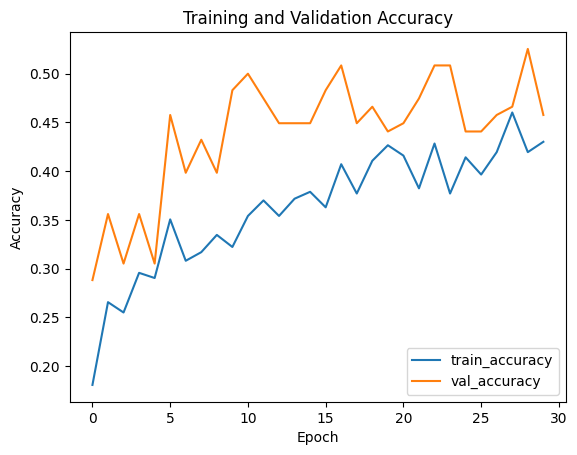

In [ ]:
# @title
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
import os
import matplotlib.pyplot as plt

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 16
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet50
num_classes = len(os.listdir(train_dir))  # Nombre de classes d'oiseaux

# Data Augmentation pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=[0.9, 1.1],
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# Data Augmentation pour les ensembles de validation et de test
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Charger le modèle ResNet50 pré-entraîné
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches de classification avec Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout pour éviter le surapprentissage
output_layer = Dense(num_classes, activation='softmax')(x)

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=output_layer)

# Geler les couches du modèle de base pour un fine-tuning initial
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle avec AdamW
model.compile(optimizer=AdamW(learning_rate=0.002, weight_decay=1e-5),  # weight_decay pour la régularisation
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle avec un nombre d'époques réduit
epochs = 30  # Nombre d'époques réduit pour éviter le surapprentissage
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


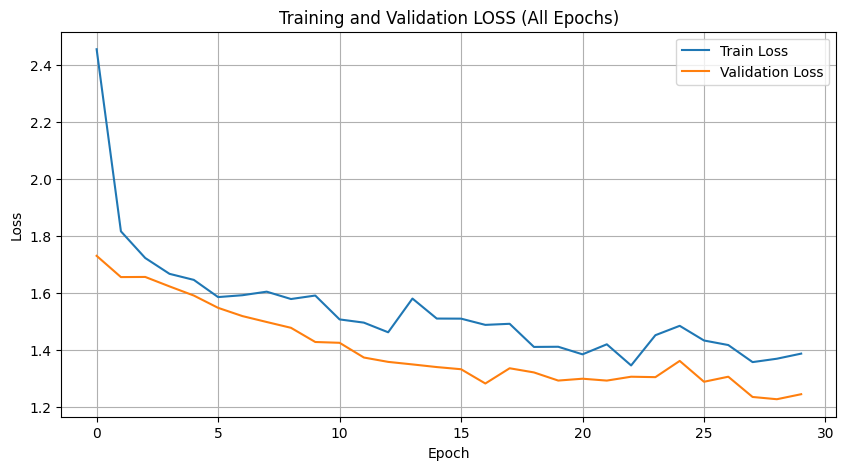

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """

36/36 ━━━━━━━━━━━━━━━━━━━━ 26s 387ms/step - accuracy: 0.1456 - loss: 2.4557 - val_accuracy: 0.2881 - val_loss: 1.7303
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.2353 - loss: 1.8163 - val_accuracy: 0.3559 - val_loss: 1.6557
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.2559 - loss: 1.7227 - val_accuracy: 0.3051 - val_loss: 1.6562
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.2935 - loss: 1.6671 - val_accuracy: 0.3559 - val_loss: 1.6230
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.2680 - loss: 1.6459 - val_accuracy: 0.3051 - val_loss: 1.5909
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.3647 - loss: 1.5855 - val_accuracy: 0.4576 - val_loss: 1.5477
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.3273 - loss: 1.5920 - val_accuracy: 0.3983 - val_loss: 1.5188
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.3170 - loss: 1.6045 - val_accuracy: 0.4322 - val_loss: 1.4980
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.3416 - loss: 1.5787 - val_accuracy: 0.3983 - val_loss: 1.4776
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - accuracy: 0.2994 - loss: 1.5909 - val_accuracy: 0.4831 - val_loss: 1.4278
Epoch 11/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.3715 - loss: 1.5071 - val_accuracy: 0.5000 - val_loss: 1.4250
Epoch 12/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.3694 - loss: 1.4958 - val_accuracy: 0.4746 - val_loss: 1.3733
Epoch 13/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.3747 - loss: 1.4619 - val_accuracy: 0.4492 - val_loss: 1.3580
Epoch 14/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.3449 - loss: 1.5803 - val_accuracy: 0.4492 - val_loss: 1.3491
Epoch 15/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.3426 - loss: 1.5101 - val_accuracy: 0.4492 - val_loss: 1.3398
Epoch 16/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.3731 - loss: 1.5098 - val_accuracy: 0.4831 - val_loss: 1.3322
Epoch 17/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.4257 - loss: 1.4879 - val_accuracy: 0.5085 - val_loss: 1.2821
Epoch 18/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.3721 - loss: 1.4917 - val_accuracy: 0.4492 - val_loss: 1.3356
Epoch 19/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.4079 - loss: 1.4105 - val_accuracy: 0.4661 - val_loss: 1.3210
Epoch 20/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.4423 - loss: 1.4111 - val_accuracy: 0.4407 - val_loss: 1.2924
Epoch 21/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.4564 - loss: 1.3845 - val_accuracy: 0.4492 - val_loss: 1.2989
Epoch 22/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.3942 - loss: 1.4197 - val_accuracy: 0.4746 - val_loss: 1.2923
Epoch 23/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.4303 - loss: 1.3455 - val_accuracy: 0.5085 - val_loss: 1.3059
Epoch 24/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.3738 - loss: 1.4517 - val_accuracy: 0.5085 - val_loss: 1.3044
Epoch 25/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.3994 - loss: 1.4846 - val_accuracy: 0.4407 - val_loss: 1.3614
Epoch 26/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.4366 - loss: 1.4331 - val_accuracy: 0.4407 - val_loss: 1.2882
Epoch 27/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.4279 - loss: 1.4171 - val_accuracy: 0.4576 - val_loss: 1.3059
Epoch 28/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.4537 - loss: 1.3572 - val_accuracy: 0.4661 - val_loss: 1.2348
Epoch 29/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.4270 - loss: 1.3691 - val_accuracy: 0.5254 - val_loss: 1.2269
Epoch 30/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.4240 - loss: 1.3870 - val_accuracy: 0.4576 - val_loss: 1.2445
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5205 - los
"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()




With AdamW and dropout

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - accuracy: 0.2219 - loss: 2.4186 - val_accuracy: 0.1695 - val_loss: 1.7148
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.2213 - loss: 1.8383 - val_accuracy: 0.4237 - val_loss: 1.6190
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.3224 - loss: 1.6590 - val_accuracy: 0.3644 - val_loss: 1.6192
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.2960 - loss: 1.6644 - val_accuracy: 0.4153 - val_loss: 1.5672
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.3131 - loss: 1.6186 - val_accuracy: 0.4746 - val_loss: 1.5093
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.3426 - loss: 1.5807 - val_accuracy: 0.4492 - val_loss: 1.4573
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.3409 - loss: 1.5619 - val_accuracy: 0.4915

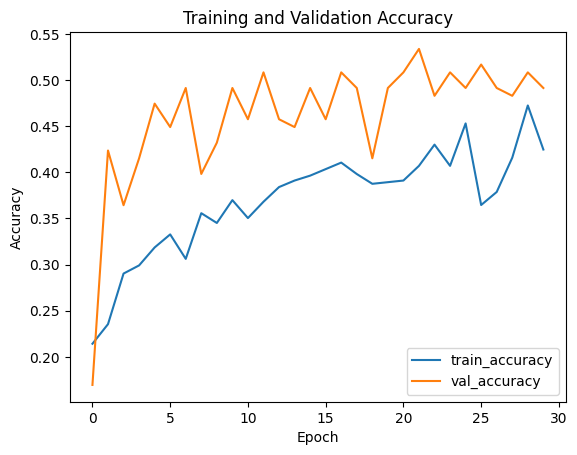

In [ ]:
# @title
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
import os
import matplotlib.pyplot as plt

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 16
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet50
num_classes = len(os.listdir(train_dir))  # Nombre de classes d'oiseaux

# Data Augmentation pour l'ensemble d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=[0.9, 1.1],
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# Data Augmentation pour les ensembles de validation et de test
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Charger le modèle ResNet50 pré-entraîné
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches de classification avec Dropout pour la régularisation
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout pour éviter le surapprentissage
output_layer = Dense(num_classes, activation='softmax')(x)

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=output_layer)

# Geler les couches du modèle de base pour un fine-tuning initial
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle avec AdamW
model.compile(optimizer=AdamW(learning_rate=0.002, weight_decay=1e-5),  # weight_decay pour la régularisation
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle avec un nombre d'époques réduit
epochs = 30  # Nombre d'époques réduit pour éviter le surapprentissage
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


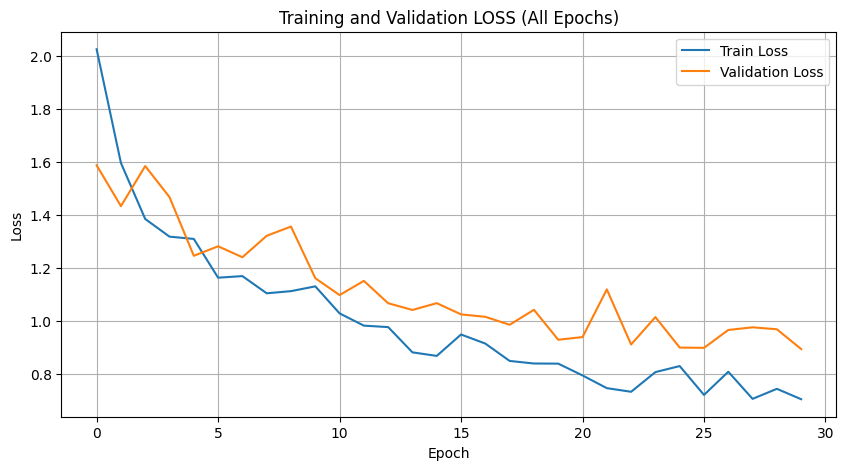

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """

ges belonging to 6 classes.
Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - accuracy: 0.2006 - loss: 2.0243 - val_accuracy: 0.4831 - val_loss: 1.5862
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3861 - loss: 1.5950 - val_accuracy: 0.4576 - val_loss: 1.4322
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4361 - loss: 1.3835 - val_accuracy: 0.3644 - val_loss: 1.5833
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4995 - loss: 1.3169 - val_accuracy: 0.3644 - val_loss: 1.4661
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.4830 - loss: 1.3083 - val_accuracy: 0.5678 - val_loss: 1.2447
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5479 - loss: 1.1620 - val_accuracy: 0.4746 - val_loss: 1.2805
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5456 - loss: 1.1680 - val_accuracy: 0.4746 - val_loss: 1.2392
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5410 - loss: 1.1031 - val_accuracy: 0.4831 - val_loss: 1.3201
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5275 - loss: 1.1112 - val_accuracy: 0.5339 - val_loss: 1.3550
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5522 - loss: 1.1293 - val_accuracy: 0.5339 - val_loss: 1.1601
Epoch 11/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5996 - loss: 1.0273 - val_accuracy: 0.5847 - val_loss: 1.0964
Epoch 12/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6611 - loss: 0.9810 - val_accuracy: 0.5339 - val_loss: 1.1499
Epoch 13/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6342 - loss: 0.9755 - val_accuracy: 0.5678 - val_loss: 1.0656
Epoch 14/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6835 - loss: 0.8802 - val_accuracy: 0.5932 - val_loss: 1.0402
Epoch 15/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6760 - loss: 0.8668 - val_accuracy: 0.5763 - val_loss: 1.0659
Epoch 16/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6368 - loss: 0.9476 - val_accuracy: 0.6780 - val_loss: 1.0235
Epoch 17/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6698 - loss: 0.9133 - val_accuracy: 0.5593 - val_loss: 1.0143
Epoch 18/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6770 - loss: 0.8478 - val_accuracy: 0.6271 - val_loss: 0.9843
Epoch 19/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6917 - loss: 0.8381 - val_accuracy: 0.5678 - val_loss: 1.0408
Epoch 20/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7146 - loss: 0.8376 - val_accuracy: 0.6780 - val_loss: 0.9278
Epoch 21/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7247 - loss: 0.7931 - val_accuracy: 0.6525 - val_loss: 0.9379
Epoch 22/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7168 - loss: 0.7451 - val_accuracy: 0.5678 - val_loss: 1.1178
Epoch 23/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7401 - loss: 0.7314 - val_accuracy: 0.6356 - val_loss: 0.9099
Epoch 24/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7323 - loss: 0.8057 - val_accuracy: 0.5424 - val_loss: 1.0134
Epoch 25/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7137 - loss: 0.8284 - val_accuracy: 0.6525 - val_loss: 0.8983
Epoch 26/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7456 - loss: 0.7195 - val_accuracy: 0.6695 - val_loss: 0.8972
Epoch 27/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6765 - loss: 0.8070 - val_accuracy: 0.6356 - val_loss: 0.9647
Epoch 28/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7685 - loss: 0.7047 - val_accuracy: 0.6864 - val_loss: 0.9747
Epoch 29/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7411 - loss: 0.7425 - val_accuracy: 0.6271 - val_loss: 0.9673
Epoch 30/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7595 - loss: 0.7033 - val_accuracy: 0.6695 - val_loss: 0.8925
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6872 - l


"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()




Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - accuracy: 0.2006 - loss: 2.0243 - val_accuracy: 0.4831 - val_loss: 1.5862
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3861 - loss: 1.5950 - val_accuracy: 0.4576 - val_loss: 1.4322
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4361 - loss: 1.3835 - val_accuracy: 0.3644 - val_loss: 1.5833
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4995 - loss: 1.3169 - val_accuracy: 0.3644 - val_loss: 1.4661
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.4830 - loss: 1.3083 - val_accuracy: 0.5678 - val_loss: 1.2447
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5479 - loss: 1.1620 - val_accuracy: 0.4746 - val_loss: 1.2805
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5456 - loss: 1.1680 - val_accuracy: 0.4746 - val

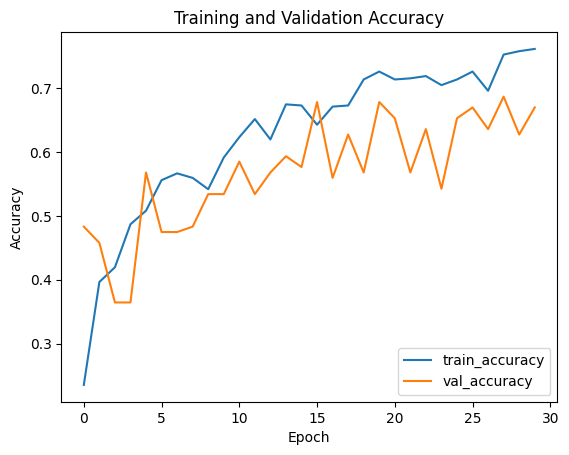

In [ ]:
# @title
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 16
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet50
num_classes = len(os.listdir(train_dir))  # Nombre de classes d'oiseaux

# Générateurs d'images sans data augmentation, seulement la normalisation
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Charger le modèle ResNet50 pré-entraîné
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Ajouter des couches de classification sans Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# Construire le modèle final
model = Model(inputs=base_model.input, outputs=output_layer)

# Geler les couches du modèle de base pour un fine-tuning initial
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle avec l'optimiseur Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle avec un nombre d'époques réduit
epochs = 30  # Nombre d'époques réduit pour éviter le surapprentissage
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


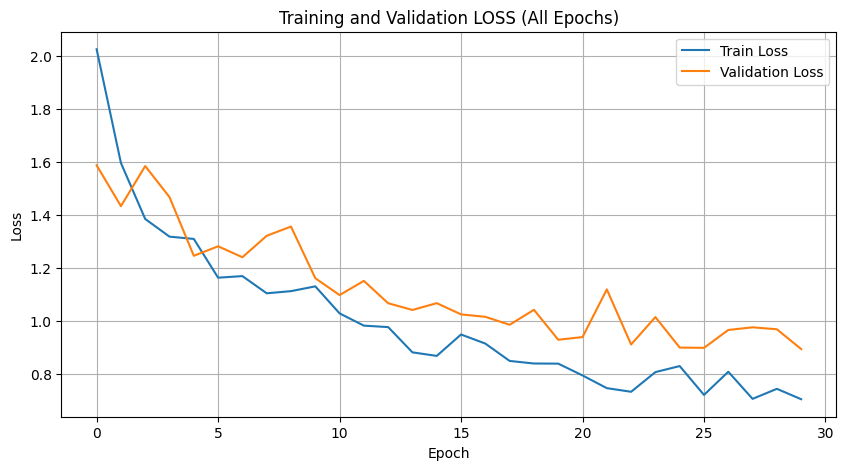

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """

ges belonging to 6 classes.
Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - accuracy: 0.2006 - loss: 2.0243 - val_accuracy: 0.4831 - val_loss: 1.5862
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3861 - loss: 1.5950 - val_accuracy: 0.4576 - val_loss: 1.4322
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4361 - loss: 1.3835 - val_accuracy: 0.3644 - val_loss: 1.5833
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4995 - loss: 1.3169 - val_accuracy: 0.3644 - val_loss: 1.4661
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.4830 - loss: 1.3083 - val_accuracy: 0.5678 - val_loss: 1.2447
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5479 - loss: 1.1620 - val_accuracy: 0.4746 - val_loss: 1.2805
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5456 - loss: 1.1680 - val_accuracy: 0.4746 - val_loss: 1.2392
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5410 - loss: 1.1031 - val_accuracy: 0.4831 - val_loss: 1.3201
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5275 - loss: 1.1112 - val_accuracy: 0.5339 - val_loss: 1.3550
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5522 - loss: 1.1293 - val_accuracy: 0.5339 - val_loss: 1.1601
Epoch 11/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5996 - loss: 1.0273 - val_accuracy: 0.5847 - val_loss: 1.0964
Epoch 12/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6611 - loss: 0.9810 - val_accuracy: 0.5339 - val_loss: 1.1499
Epoch 13/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6342 - loss: 0.9755 - val_accuracy: 0.5678 - val_loss: 1.0656
Epoch 14/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6835 - loss: 0.8802 - val_accuracy: 0.5932 - val_loss: 1.0402
Epoch 15/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6760 - loss: 0.8668 - val_accuracy: 0.5763 - val_loss: 1.0659
Epoch 16/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6368 - loss: 0.9476 - val_accuracy: 0.6780 - val_loss: 1.0235
Epoch 17/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6698 - loss: 0.9133 - val_accuracy: 0.5593 - val_loss: 1.0143
Epoch 18/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6770 - loss: 0.8478 - val_accuracy: 0.6271 - val_loss: 0.9843
Epoch 19/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6917 - loss: 0.8381 - val_accuracy: 0.5678 - val_loss: 1.0408
Epoch 20/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7146 - loss: 0.8376 - val_accuracy: 0.6780 - val_loss: 0.9278
Epoch 21/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7247 - loss: 0.7931 - val_accuracy: 0.6525 - val_loss: 0.9379
Epoch 22/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7168 - loss: 0.7451 - val_accuracy: 0.5678 - val_loss: 1.1178
Epoch 23/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7401 - loss: 0.7314 - val_accuracy: 0.6356 - val_loss: 0.9099
Epoch 24/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7323 - loss: 0.8057 - val_accuracy: 0.5424 - val_loss: 1.0134
Epoch 25/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7137 - loss: 0.8284 - val_accuracy: 0.6525 - val_loss: 0.8983
Epoch 26/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7456 - loss: 0.7195 - val_accuracy: 0.6695 - val_loss: 0.8972
Epoch 27/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6765 - loss: 0.8070 - val_accuracy: 0.6356 - val_loss: 0.9647
Epoch 28/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7685 - loss: 0.7047 - val_accuracy: 0.6864 - val_loss: 0.9747
Epoch 29/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7411 - loss: 0.7425 - val_accuracy: 0.6271 - val_loss: 0.9673
Epoch 30/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7595 - loss: 0.7033 - val_accuracy: 0.6695 - val_loss: 0.8925
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6872 - l


"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()




After trying many regularization methods, like dropping the batch size, adding more data augmentation, changing the optimizer to AdamW, dropout, the learning rate, or even changing the cost and activation function or adding more epochs, the model was getting less and less robust. Finally I tried the more basic one possible, without data augmentation and it had the best results. Sometimes maybe because of the set size, the model performs better with less complexity. So finally, from a model with 60% on the test accuracy, we passed thru 50% and finally 68% with the more basic model.


An objective look to our choice of ResNet50, after more sleep and documentation:
---

Let's see how many layers our differents models had:


1.   InceptionV3: 48
1.   EfficientNetB0: 82 ...
3.   Resnet50: 50 layers

Deep VS. Wide Dilemma:
Wide models perform in memorization, while deep models will get different patterns in differents abstraction levels, and more deep and complex the model is, more samples in the data it will need. This is why EfficientNet50 results were so catastrophics, and then ResNet50 was not that bad, and EfficientNetB0 was super performant, maybe the reason is that we used a pretrained model, based on 1 million images over 1000 categories.


#Model F:

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 468s 11s/step - accuracy: 0.4813 - loss: 2.0866 - val_accuracy: 0.2881 - val_loss: 7.0302
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7191 - loss: 0.8453 - val_accuracy: 0.3305 - val_loss: 3.1966
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8005 - loss: 0.6282 - val_accuracy: 0.4576 - val_loss: 1.9499
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8203 - loss: 0.4742 - val_accuracy: 0.5169 - val_loss: 2.1892
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8278 - loss: 0.5016 - val_accuracy: 0.4407 - val_loss: 1.6920
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8457 - loss: 0.4558 - val_accuracy: 0.2881 - val_loss: 2.1796
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8833 - loss: 0.3041 - val_accuracy: 0.5254 - val_loss: 1.3966
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8636 - loss: 0.3581 - val_accuracy: 0.4492 - val_loss: 2

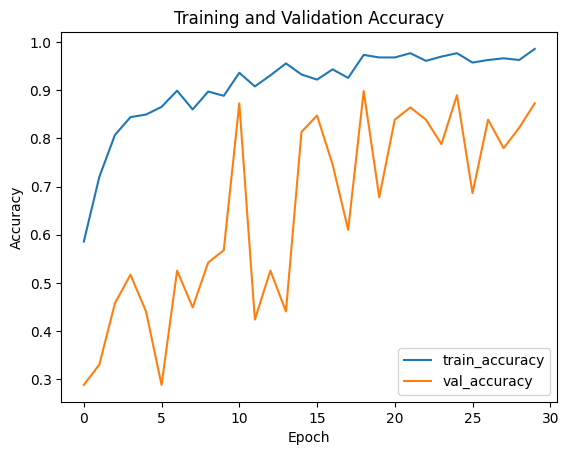

In [ ]:
# @title
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

# Fonction pour créer un bloc résiduel
def residual_block(x, filters, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=3, strides=stride, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    # Adapter le shortcut si le stride n'est pas 1
    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Construire ResNet-18
def ResNet18(input_shape=(224, 224, 3), num_classes=6):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    # Ajout des blocs résiduels
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, outputs)
    return model

# Initialiser le modèle ResNet-18
model = ResNet18(input_shape=(224, 224, 3), num_classes=6)

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 16
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet-18
num_classes = len(os.listdir(train_dir))  # Nombre de classes d'oiseaux

# Générateurs d'images sans data augmentation, seulement la normalisation
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compiler le modèle avec l'optimiseur Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle avec un nombre d'époques réduit
epochs = 30  # Nombre d'époques réduit pour éviter le surapprentissage
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


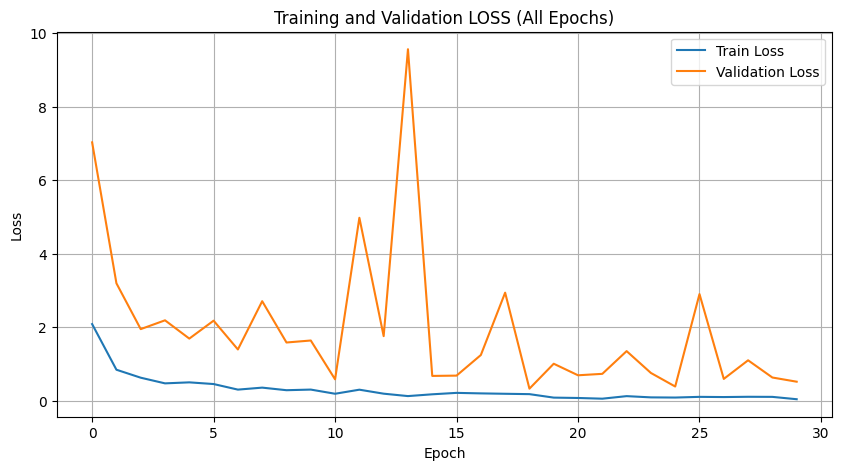

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """
36/36 ━━━━━━━━━━━━━━━━━━━━ 468s 11s/step - accuracy: 0.4813 - loss: 2.0866 - val_accuracy: 0.2881 - val_loss: 7.0302
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7191 - loss: 0.8453 - val_accuracy: 0.3305 - val_loss: 3.1966
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8005 - loss: 0.6282 - val_accuracy: 0.4576 - val_loss: 1.9499
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8203 - loss: 0.4742 - val_accuracy: 0.5169 - val_loss: 2.1892
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8278 - loss: 0.5016 - val_accuracy: 0.4407 - val_loss: 1.6920
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8457 - loss: 0.4558 - val_accuracy: 0.2881 - val_loss: 2.1796
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8833 - loss: 0.3041 - val_accuracy: 0.5254 - val_loss: 1.3966
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8636 - loss: 0.3581 - val_accuracy: 0.4492 - val_loss: 2.7095
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9064 - loss: 0.2880 - val_accuracy: 0.5424 - val_loss: 1.5858
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9081 - loss: 0.3051 - val_accuracy: 0.5678 - val_loss: 1.6401
Epoch 11/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9366 - loss: 0.1916 - val_accuracy: 0.8729 - val_loss: 0.5838
Epoch 12/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9083 - loss: 0.3022 - val_accuracy: 0.4237 - val_loss: 4.9790
Epoch 13/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9309 - loss: 0.1935 - val_accuracy: 0.5254 - val_loss: 1.7590
Epoch 14/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9594 - loss: 0.1281 - val_accuracy: 0.4407 - val_loss: 9.5637
Epoch 15/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9466 - loss: 0.1767 - val_accuracy: 0.8136 - val_loss: 0.6767
Epoch 16/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9253 - loss: 0.2154 - val_accuracy: 0.8475 - val_loss: 0.6849
Epoch 17/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9324 - loss: 0.2015 - val_accuracy: 0.7458 - val_loss: 1.2449
Epoch 18/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9211 - loss: 0.1909 - val_accuracy: 0.6102 - val_loss: 2.9411
Epoch 19/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9645 - loss: 0.1810 - val_accuracy: 0.8983 - val_loss: 0.3299
Epoch 20/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9710 - loss: 0.0864 - val_accuracy: 0.6780 - val_loss: 1.0082
Epoch 21/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9800 - loss: 0.0766 - val_accuracy: 0.8390 - val_loss: 0.6940
Epoch 22/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9823 - loss: 0.0574 - val_accuracy: 0.8644 - val_loss: 0.7332
Epoch 23/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9624 - loss: 0.1267 - val_accuracy: 0.8390 - val_loss: 1.3512
Epoch 24/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9694 - loss: 0.0931 - val_accuracy: 0.7881 - val_loss: 0.7572
Epoch 25/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9704 - loss: 0.0883 - val_accuracy: 0.8898 - val_loss: 0.3884
Epoch 26/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9708 - loss: 0.1071 - val_accuracy: 0.6864 - val_loss: 2.9027
Epoch 27/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9547 - loss: 0.1016 - val_accuracy: 0.8390 - val_loss: 0.5952
Epoch 28/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9616 - loss: 0.1091 - val_accuracy: 0.7797 - val_loss: 1.1017
Epoch 29/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9576 - loss: 0.1067 - val_accuracy: 0.8220 - val_loss: 0.6333
Epoch 30/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9881 - loss: 0.0428 - val_accuracy: 0.8729 - val_loss: 0.5195
8/8 ━━━━━━━━━━━━━━━━━━━━ 78s 11s/step - accuracy: 0.8858 - : 0.3357


"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()




The final result is pretty good, but we cannot be realy sure of the result, there is too much variances between the val_accuracy over the epochs, we will add data augmentation and dropout.

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 588ms/step - accuracy: 0.2848 - loss: 2.8466 - val_accuracy: 0.2542 - val_loss: 36.1563
Epoch 2/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.4050 - loss: 1.6836 - val_accuracy: 0.1780 - val_loss: 25.8757
Epoch 3/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.4313 - loss: 1.4391 - val_accuracy: 0.2034 - val_loss: 4.6037
Epoch 4/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.4935 - loss: 1.3507 - val_accuracy: 0.3814 - val_loss: 3.5499
Epoch 5/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.4267 - loss: 1.6982 - val_accuracy: 0.3220 - val_loss: 2.2971
Epoch 6/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.5797 - loss: 1.1940 - val_accuracy: 0.5763 - val_loss: 1.2842
Epoch 7/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.5337 - loss: 1.2087 - val_accuracy: 0.50

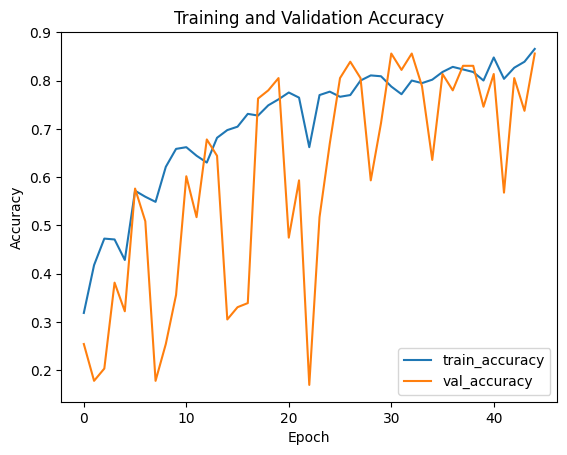

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt

# Fonction pour créer un bloc résiduel
def residual_block(x, filters, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=3, strides=stride, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    # Adapter le shortcut si le stride n'est pas 1
    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

from tensorflow.keras.layers import Dropout
# Construire ResNet-18

# Modifier la fonction ResNet18 pour ajouter Dropout
from tensorflow.keras.layers import Dropout

def ResNet18(input_shape=(224, 224, 3), num_classes=6):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = Dropout(0.3)(x)  # Ajouter Dropout après le premier bloc

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = Dropout(0.3)(x)  # Ajouter Dropout après le deuxième bloc

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = Dropout(0.3)(x)  # Ajouter Dropout après le troisième bloc

    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout final avant la couche de sortie
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, outputs)
    return model


# Initialiser le modèle ResNet-18
model = ResNet18(input_shape=(224, 224, 3), num_classes=6)

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 16
img_height, img_width = 224, 224  # Taille d'entrée pour ResNet-18
num_classes = len(os.listdir(train_dir))  # Nombre de classes d'oiseaux

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=90,         # Rotation aléatoire jusqu'à 35 degrés
    width_shift_range=0.2,     # Décalage horizontal aléatoire jusqu'à 20%
    height_shift_range=0.2,    # Décalage vertical aléatoire jusqu'à 20%
    zoom_range=[0.7, 1.4],     # Zoom aléatoire entre 80% et 120% de l'image
    shear_range=0.5,           # Cisaillement aléatoire
    brightness_range=[0.3, 1.5], # Variation de luminosité entre 70% et 130%
    horizontal_flip=True       # Retournement horizontal aléatoire
)


# Générateur d'images pour la validation et le test (sans augmentation)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateurs d'images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compiler le modèle avec l'optimiseur Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle avec un nombre d'époques réduit
epochs = 45  # Nombre d'époques réduit pour éviter le surapprentissage
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionnel : Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

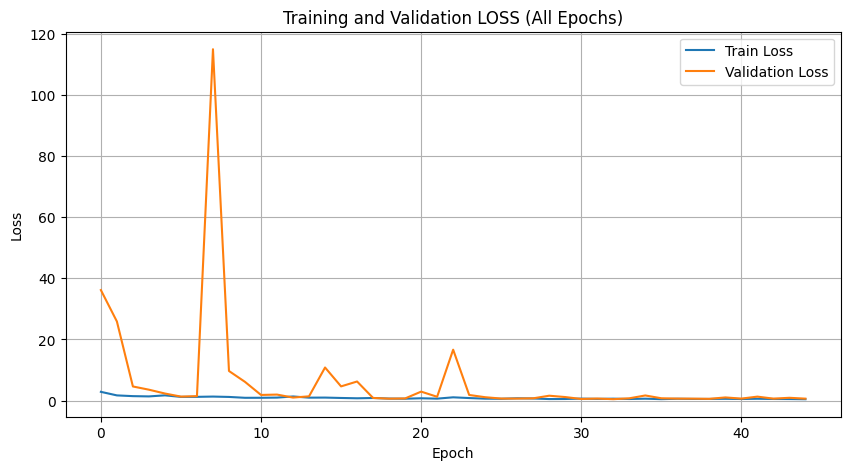

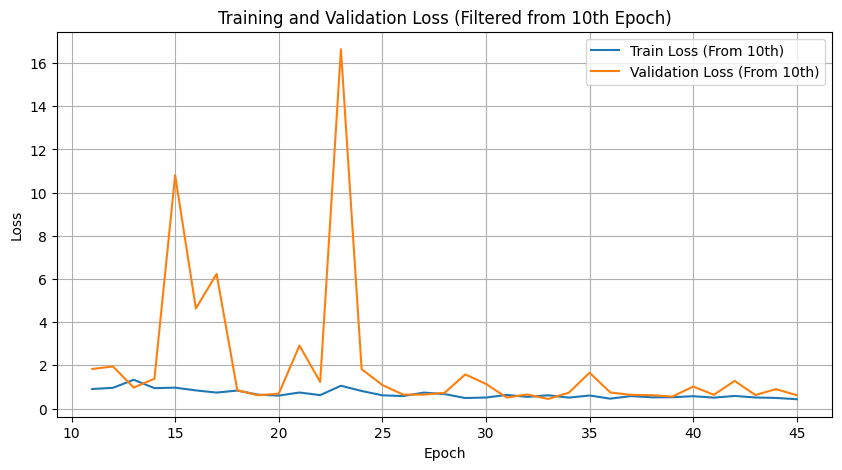

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """
Found 128 images belonging to 6 classes.
Epoch 1/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 588ms/step - accuracy: 0.2848 - loss: 2.8466 - val_accuracy: 0.2542 - val_loss: 36.1563
Epoch 2/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.4050 - loss: 1.6836 - val_accuracy: 0.1780 - val_loss: 25.8757
Epoch 3/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.4313 - loss: 1.4391 - val_accuracy: 0.2034 - val_loss: 4.6037
Epoch 4/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.4935 - loss: 1.3507 - val_accuracy: 0.3814 - val_loss: 3.5499
Epoch 5/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.4267 - loss: 1.6982 - val_accuracy: 0.3220 - val_loss: 2.2971
Epoch 6/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.5797 - loss: 1.1940 - val_accuracy: 0.5763 - val_loss: 1.2842
Epoch 7/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.5337 - loss: 1.2087 - val_accuracy: 0.5085 - val_loss: 1.4413
Epoch 8/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.5453 - loss: 1.2954 - val_accuracy: 0.1780 - val_loss: 114.9736
Epoch 9/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.6039 - loss: 1.1784 - val_accuracy: 0.2542 - val_loss: 9.6675
Epoch 10/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.6744 - loss: 0.8949 - val_accuracy: 0.3559 - val_loss: 6.1097
Epoch 11/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.6911 - loss: 0.9030 - val_accuracy: 0.6017 - val_loss: 1.8307
Epoch 12/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.6501 - loss: 0.9583 - val_accuracy: 0.5169 - val_loss: 1.9487
Epoch 13/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.6265 - loss: 1.3320 - val_accuracy: 0.6780 - val_loss: 0.9676
Epoch 14/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.6554 - loss: 0.9432 - val_accuracy: 0.6441 - val_loss: 1.3789
Epoch 15/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.6877 - loss: 0.9663 - val_accuracy: 0.3051 - val_loss: 10.8094
Epoch 16/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.6896 - loss: 0.8392 - val_accuracy: 0.3305 - val_loss: 4.6305
Epoch 17/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.7317 - loss: 0.7376 - val_accuracy: 0.3390 - val_loss: 6.2309
Epoch 18/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.7058 - loss: 0.8313 - val_accuracy: 0.7627 - val_loss: 0.8442
Epoch 19/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.8021 - loss: 0.6414 - val_accuracy: 0.7797 - val_loss: 0.6139
Epoch 20/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.7920 - loss: 0.5980 - val_accuracy: 0.8051 - val_loss: 0.6848
Epoch 21/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.7606 - loss: 0.7410 - val_accuracy: 0.4746 - val_loss: 2.9160
Epoch 22/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.7906 - loss: 0.6197 - val_accuracy: 0.5932 - val_loss: 1.2295
Epoch 23/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.6613 - loss: 1.0540 - val_accuracy: 0.1695 - val_loss: 16.6413
Epoch 24/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.7417 - loss: 0.8116 - val_accuracy: 0.5169 - val_loss: 1.8228
Epoch 25/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.7811 - loss: 0.6117 - val_accuracy: 0.6695 - val_loss: 1.0870
Epoch 26/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.7938 - loss: 0.5747 - val_accuracy: 0.8051 - val_loss: 0.6457
Epoch 27/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.7758 - loss: 0.7363 - val_accuracy: 0.8390 - val_loss: 0.6429
Epoch 28/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.7945 - loss: 0.6681 - val_accuracy: 0.8051 - val_loss: 0.7247
Epoch 29/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.8369 - loss: 0.4857 - val_accuracy: 0.5932 - val_loss: 1.5788
Epoch 30/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.8275 - loss: 0.5084 - val_accuracy: 0.7119 - val_loss: 1.1387
Epoch 31/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.7787 - loss: 0.6299 - val_accuracy: 0.8559 - val_loss: 0.5087
Epoch 32/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.8179 - loss: 0.5394 - val_accuracy: 0.8220 - val_loss: 0.6501
Epoch 33/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.7585 - loss: 0.6125 - val_accuracy: 0.8559 - val_loss: 0.4409
Epoch 34/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.8084 - loss: 0.5043 - val_accuracy: 0.7881 - val_loss: 0.7329
Epoch 35/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.7677 - loss: 0.6023 - val_accuracy: 0.6356 - val_loss: 1.6591
Epoch 36/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.8318 - loss: 0.4564 - val_accuracy: 0.8136 - val_loss: 0.7427
Epoch 37/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.8146 - loss: 0.5757 - val_accuracy: 0.7797 - val_loss: 0.6318
Epoch 38/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.8070 - loss: 0.5184 - val_accuracy: 0.8305 - val_loss: 0.6164
Epoch 39/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - accuracy: 0.8243 - loss: 0.5230 - val_accuracy: 0.8305 - val_loss: 0.5536
Epoch 40/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.7966 - loss: 0.5692 - val_accuracy: 0.7458 - val_loss: 1.0165
Epoch 41/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.8518 - loss: 0.5031 - val_accuracy: 0.8136 - val_loss: 0.6361
Epoch 42/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.8093 - loss: 0.5822 - val_accuracy: 0.5678 - val_loss: 1.2796
Epoch 43/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.7925 - loss: 0.5111 - val_accuracy: 0.8051 - val_loss: 0.6251
Epoch 44/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.8368 - loss: 0.4896 - val_accuracy: 0.7373 - val_loss: 0.8971
Epoch 45/45
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.8647 - loss: 0.4301 - val_accuracy: 0.8559 - val_loss: 0.6160
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9031 -

"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Graphique 2 : À partir de la 10ème occurrence
start_index = 10
filtered_loss = history_dict[' loss'][start_index:] if len(history_dict[' loss']) > start_index else []
filtered_val_loss = history_dict['val_loss'][start_index:] if len(history_dict['val_loss']) > start_index else []

if filtered_loss and filtered_val_loss:
    # Ajuster les indices de l'axe x pour commencer à 10
    epochs = list(range(start_index + 1, start_index + 1 + len(filtered_loss)))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, filtered_loss, label='Train Loss (From 10th)')
    plt.plot(epochs, filtered_val_loss, label='Validation Loss (From 10th)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss (Filtered from 10th Epoch)')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
else:
    print(" ... ")

I have:

*   Batch normalizaiton
*   Dropout
*   optimizer AdamW, weight_decay=1e-5
*   Adata Augmentation
*   Élément de liste


---


ADD:


*   early stopping
*   Élément de liste


TRY:  

- bigger batch size + more epochs
- Stochastic Depth







#Model G

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 253s 8s/step - accuracy: 0.2272 - loss: 3.3550 - val_accuracy: 0.1610 - val_loss: 914.0231
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.4296 - loss: 1.7811 - val_accuracy: 0.1695 - val_loss: 37.4270
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.5297 - loss: 1.2519 - val_accuracy: 0.3136 - val_loss: 2.9150
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.6151 - loss: 1.1149 - val_accuracy: 0.3390 - val_loss: 3.1198
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.6304 - loss: 1.0231 - val_accuracy: 0.3559 - val_loss: 2.5497
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.6809 - loss: 0.9445 - val_accuracy: 0.3390 - val_loss: 3.2269
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.7069 - loss: 0.8082 - val_accuracy: 0.3305 - val_loss: 4.4121
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.7387 - loss: 0.7914 - val_accuracy: 0.3390 - va

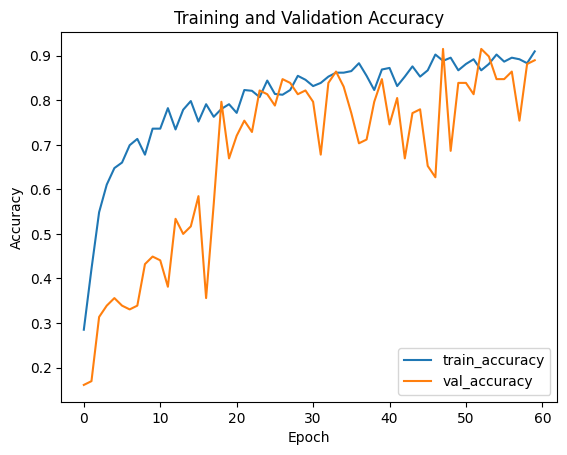

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, MaxPooling2D, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW  # Utilisation de AdamW
import os
import matplotlib.pyplot as plt

# Fonction pour créer un bloc résiduel
def residual_block(x, filters, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=3, strides=stride, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    # Adapter le shortcut si le stride n'est pas 1
    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Construire ResNet-18 avec Dropout
def ResNet18(input_shape=(224, 224, 3), num_classes=6):
 ''' Input Layer
     7x7 convolution, 64 filters, stride=2
     Batch Normalization
     ReLU
     MaxPooling 3x3, stride=2 '''
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

 ''' Bloc 1
     Two residual blocks with 64 filters
     Convolution size: 3x3, stride=1 for both convolutions in each block
     Block output: same dimension as the input (56x56 if the input is 224x224)'''
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = Dropout(0.3)(x)

 ''' Block 2
     Two residual blocks with 128 filters
     Convolution size: 3x3, stride=2 for the first convolution
     of the first block to reduce the resolution to 28x28, then stride=1'''
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = Dropout(0.3)(x)

 ''' Block 3
     Two residual blocks with 256 filters
     Convolution size: 3x3, stride=2 for the first convolution
     of the first block to reduce the resolution to 14x14, then stride=1'''
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = Dropout(0.3)(x)

 ''' Bloc 4
     Two residual blocks with 512 filters
     Convolution size: 3x3, stride=2 for the first
     convolution of the first block to reduce the resolution to 7x7'''
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

 ''' Output Layer
     Global Average Pooling: Reduces each 7x7 trait card to a single value
     Dense (Fully Connected) Layer:
     Number of neurons = number of classes (for example, 1000 for ImageNet)
     Softmax activation for final classification'''
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, outputs)
    return model

# Initialiser le modèle ResNet-18
model = ResNet18(input_shape=(224, 224, 3), num_classes=6)

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 224, 224

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=[0.7, 1.4],
    shear_range=0.5,
    brightness_range=[0.3, 1.5],
    horizontal_flip=True
)

# Générateur d'images pour la validation et le test
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compiler le modèle avec l'optimiseur AdamW
model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
epochs = 60
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


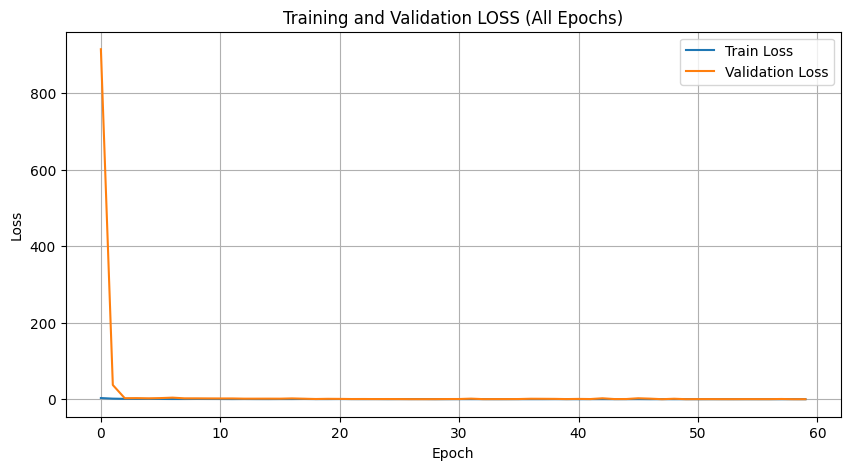

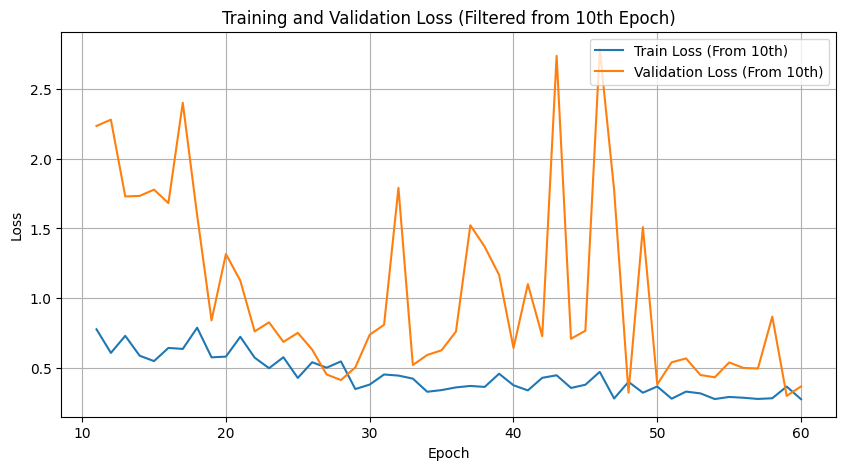

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """
18/18 ━━━━━━━━━━━━━━━━━━━━ 253s 8s/step - accuracy: 0.2272 - loss: 3.3550 - val_accuracy: 0.1610 - val_loss: 914.0231
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.4296 - loss: 1.7811 - val_accuracy: 0.1695 - val_loss: 37.4270
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.5297 - loss: 1.2519 - val_accuracy: 0.3136 - val_loss: 2.9150
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.6151 - loss: 1.1149 - val_accuracy: 0.3390 - val_loss: 3.1198
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.6304 - loss: 1.0231 - val_accuracy: 0.3559 - val_loss: 2.5497
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.6809 - loss: 0.9445 - val_accuracy: 0.3390 - val_loss: 3.2269
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.7069 - loss: 0.8082 - val_accuracy: 0.3305 - val_loss: 4.4121
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.7387 - loss: 0.7914 - val_accuracy: 0.3390 - val_loss: 2.5647
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.6708 - loss: 0.9089 - val_accuracy: 0.4322 - val_loss: 2.4869
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.6976 - loss: 0.8427 - val_accuracy: 0.4492 - val_loss: 2.3129
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.7531 - loss: 0.7756 - val_accuracy: 0.4407 - val_loss: 2.2365
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.7914 - loss: 0.6057 - val_accuracy: 0.3814 - val_loss: 2.2816
Epoch 13/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.7464 - loss: 0.7285 - val_accuracy: 0.5339 - val_loss: 1.7299
Epoch 14/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.8044 - loss: 0.5857 - val_accuracy: 0.5000 - val_loss: 1.7337
Epoch 15/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.8266 - loss: 0.5470 - val_accuracy: 0.5169 - val_loss: 1.7789
Epoch 16/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - accuracy: 0.7763 - loss: 0.6416 - val_accuracy: 0.5847 - val_loss: 1.6822
Epoch 17/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.7992 - loss: 0.6345 - val_accuracy: 0.3559 - val_loss: 2.4030
Epoch 18/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.7513 - loss: 0.7869 - val_accuracy: 0.5678 - val_loss: 1.5943
Epoch 19/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.7620 - loss: 0.5741 - val_accuracy: 0.7966 - val_loss: 0.8395
Epoch 20/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.7977 - loss: 0.5790 - val_accuracy: 0.6695 - val_loss: 1.3161
Epoch 21/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.7632 - loss: 0.7217 - val_accuracy: 0.7203 - val_loss: 1.1252
Epoch 22/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.8188 - loss: 0.5717 - val_accuracy: 0.7542 - val_loss: 0.7603
Epoch 23/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.8211 - loss: 0.4960 - val_accuracy: 0.7288 - val_loss: 0.8256
Epoch 24/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.8097 - loss: 0.5746 - val_accuracy: 0.8220 - val_loss: 0.6848
Epoch 25/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.8533 - loss: 0.4260 - val_accuracy: 0.8136 - val_loss: 0.7499
Epoch 26/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.8125 - loss: 0.5389 - val_accuracy: 0.7881 - val_loss: 0.6295
Epoch 27/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.8220 - loss: 0.4994 - val_accuracy: 0.8475 - val_loss: 0.4512
Epoch 28/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.8079 - loss: 0.5447 - val_accuracy: 0.8390 - val_loss: 0.4108
Epoch 29/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.8685 - loss: 0.3461 - val_accuracy: 0.8136 - val_loss: 0.5014
Epoch 30/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.8628 - loss: 0.3783 - val_accuracy: 0.8220 - val_loss: 0.7362
Epoch 31/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.8360 - loss: 0.4509 - val_accuracy: 0.7966 - val_loss: 0.8079
Epoch 32/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.8414 - loss: 0.4429 - val_accuracy: 0.6780 - val_loss: 1.7918
Epoch 33/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 0.8431 - loss: 0.4212 - val_accuracy: 0.8390 - val_loss: 0.5187
Epoch 34/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.8660 - loss: 0.3267 - val_accuracy: 0.8644 - val_loss: 0.5909
Epoch 35/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.8616 - loss: 0.3387 - val_accuracy: 0.8305 - val_loss: 0.6248
Epoch 36/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.8878 - loss: 0.3581 - val_accuracy: 0.7712 - val_loss: 0.7596
Epoch 37/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.8941 - loss: 0.3684 - val_accuracy: 0.7034 - val_loss: 1.5229
Epoch 38/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.8674 - loss: 0.3616 - val_accuracy: 0.7119 - val_loss: 1.3684
Epoch 39/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 316ms/step - accuracy: 0.8513 - loss: 0.4563 - val_accuracy: 0.7966 - val_loss: 1.1661
Epoch 40/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.8639 - loss: 0.3734 - val_accuracy: 0.8475 - val_loss: 0.6412
Epoch 41/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8856 - loss: 0.3365 - val_accuracy: 0.7458 - val_loss: 1.1001
Epoch 42/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.8660 - loss: 0.4269 - val_accuracy: 0.8051 - val_loss: 0.7263
Epoch 43/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.8433 - loss: 0.4451 - val_accuracy: 0.6695 - val_loss: 2.7399
Epoch 44/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.8730 - loss: 0.3542 - val_accuracy: 0.7712 - val_loss: 0.7073
Epoch 45/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.8719 - loss: 0.3771 - val_accuracy: 0.7797 - val_loss: 0.7650
Epoch 46/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.8544 - loss: 0.4697 - val_accuracy: 0.6525 - val_loss: 2.7877
Epoch 47/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.9058 - loss: 0.2784 - val_accuracy: 0.6271 - val_loss: 1.7765
Epoch 48/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.8634 - loss: 0.3979 - val_accuracy: 0.9153 - val_loss: 0.3203
Epoch 49/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.8979 - loss: 0.3199 - val_accuracy: 0.6864 - val_loss: 1.5097
Epoch 50/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.8653 - loss: 0.3648 - val_accuracy: 0.8390 - val_loss: 0.3800
Epoch 51/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.9012 - loss: 0.2769 - val_accuracy: 0.8390 - val_loss: 0.5384
Epoch 52/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.8932 - loss: 0.3279 - val_accuracy: 0.8136 - val_loss: 0.5661
Epoch 53/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8621 - loss: 0.3151 - val_accuracy: 0.9153 - val_loss: 0.4472
Epoch 54/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.9084 - loss: 0.2744 - val_accuracy: 0.8983 - val_loss: 0.4307
Epoch 55/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.9018 - loss: 0.2894 - val_accuracy: 0.8475 - val_loss: 0.5373
Epoch 56/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.8715 - loss: 0.2836 - val_accuracy: 0.8475 - val_loss: 0.4976
Epoch 57/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.8976 - loss: 0.2751 - val_accuracy: 0.8644 - val_loss: 0.4939
Epoch 58/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.8936 - loss: 0.2801 - val_accuracy: 0.7542 - val_loss: 0.8666
Epoch 59/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.8512 - loss: 0.3640 - val_accuracy: 0.8814 - val_loss: 0.2972
Epoch 60/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.9031 - loss: 0.2731 - val_accuracy: 0.8898 - val_loss: 0.3651


"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Graphique 2 : À partir de la 10ème occurrence
start_index = 10
filtered_loss = history_dict[' loss'][start_index:] if len(history_dict[' loss']) > start_index else []
filtered_val_loss = history_dict['val_loss'][start_index:] if len(history_dict['val_loss']) > start_index else []

if filtered_loss and filtered_val_loss:
    # Ajuster les indices de l'axe x pour commencer à 10
    epochs = list(range(start_index + 1, start_index + 1 + len(filtered_loss)))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, filtered_loss, label='Train Loss (From 10th)')
    plt.plot(epochs, filtered_val_loss, label='Validation Loss (From 10th)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss (Filtered from 10th Epoch)')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
else:
    print(" ... ")

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 483s 17s/step - accuracy: 0.2088 - loss: 2.3413 - val_accuracy: 0.1610 - val_loss: 1.8081
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.3098 - loss: 1.8530 - val_accuracy: 0.1695 - val_loss: 1.8413
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.4836 - loss: 1.4202 - val_accuracy: 0.1695 - val_loss: 1.8512
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 318ms/step - accuracy: 0.5430 - loss: 1.2841 - val_accuracy: 0.1695 - val_loss: 2.0652
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.5674 - loss: 1.1820 - val_accuracy: 0.1949 - val_loss: 2.1006
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.6337 - loss: 0.9723 - val_accuracy: 0.1610 - val_loss: 2.5349
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.6877 - loss: 0.8926 - val_accuracy: 0.2712 - val_loss: 2.8973
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.6976 - loss: 0.8484 - val_accuracy: 0.2627 - val_

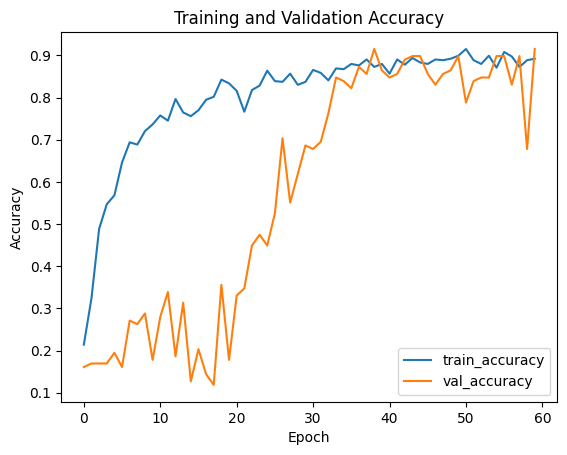

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, MaxPooling2D, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW  # Utilisation de AdamW
import os
import matplotlib.pyplot as plt

# Fonction pour créer un bloc résiduel
def residual_block(x, filters, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=3, strides=stride, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    # Adapter le shortcut si le stride n'est pas 1
    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Construire ResNet-18 avec Dropout
def ResNet18(input_shape=(224, 224, 3), num_classes=6):
    ''' Input Layer
        7x7 convolution, 64 filters, stride=2
        Batch Normalization
        ReLU
        MaxPooling 3x3, stride=2 '''
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    ''' Bloc 1
        Two residual blocks with 64 filters
        Convolution size: 3x3, stride=1 for both convolutions in each block
        Block output: same dimension as the input (56x56 if the input is 224x224)'''
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = Dropout(0.3)(x)

    ''' Block 2
        Two residual blocks with 128 filters
        Convolution size: 3x3, stride=2 for the first convolution
        of the first block to reduce the resolution to 28x28, then stride=1'''
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = Dropout(0.3)(x)

    ''' Block 3
        Two residual blocks with 256 filters
        Convolution size: 3x3, stride=2 for the first convolution
        of the first block to reduce the resolution to 14x14, then stride=1'''
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = Dropout(0.3)(x)

    ''' Bloc 4
        Two residual blocks with 512 filters
        Convolution size: 3x3, stride=2 for the first
        convolution of the first block to reduce the resolution to 7x7'''
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    ''' Output Layer
        Global Average Pooling: Reduces each 7x7 trait card to a single value
        Dense (Fully Connected) Layer:
        Number of neurons = number of classes (for example, 1000 for ImageNet)
        Softmax activation for final classification'''
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, outputs)
    return model

# Initialiser le modèle ResNet-18
model = ResNet18(input_shape=(224, 224, 3), num_classes=6)

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 224, 224

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=[0.7, 1.4],
    shear_range=0.5,
    brightness_range=[0.3, 1.5],
    horizontal_flip=True
)

# Générateur d'images pour la validation et le test
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compiler le modèle avec l'optimiseur AdamW
model.compile(optimizer=AdamW(learning_rate=0.0001, weight_decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
epochs = 60
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


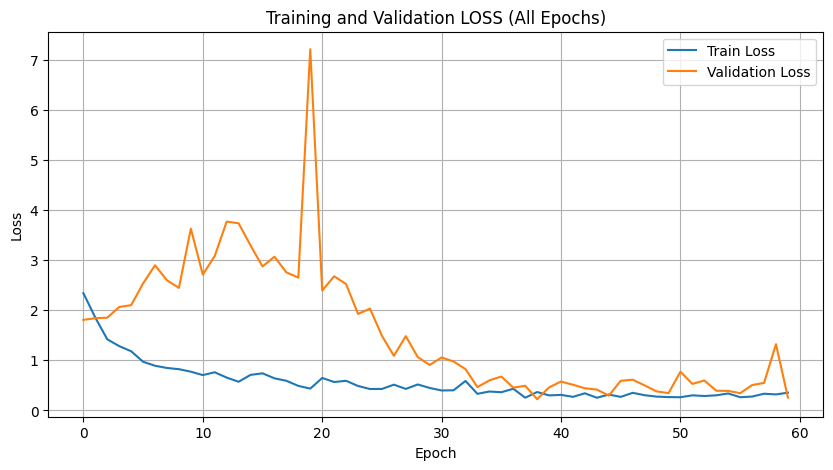

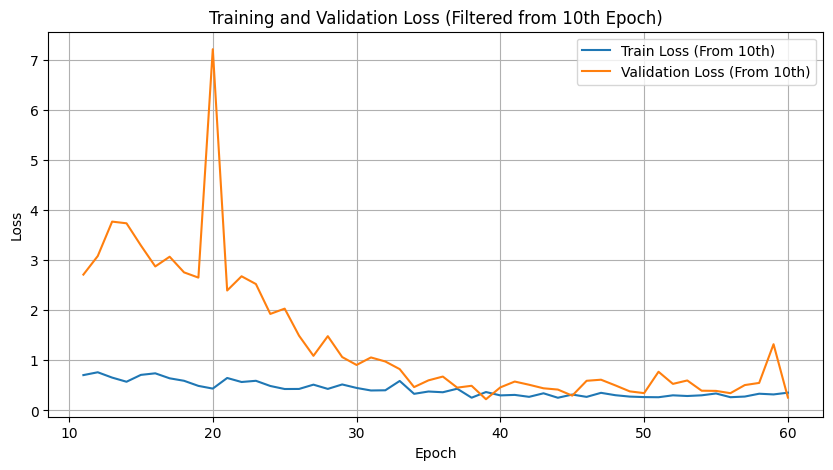

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """
18/18 ━━━━━━━━━━━━━━━━━━━━ 483s 17s/step - accuracy: 0.2088 - loss: 2.3413 - val_accuracy: 0.1610 - val_loss: 1.8081
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.3098 - loss: 1.8530 - val_accuracy: 0.1695 - val_loss: 1.8413
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.4836 - loss: 1.4202 - val_accuracy: 0.1695 - val_loss: 1.8512
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 318ms/step - accuracy: 0.5430 - loss: 1.2841 - val_accuracy: 0.1695 - val_loss: 2.0652
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.5674 - loss: 1.1820 - val_accuracy: 0.1949 - val_loss: 2.1006
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.6337 - loss: 0.9723 - val_accuracy: 0.1610 - val_loss: 2.5349
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.6877 - loss: 0.8926 - val_accuracy: 0.2712 - val_loss: 2.8973
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.6976 - loss: 0.8484 - val_accuracy: 0.2627 - val_loss: 2.5972
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.7128 - loss: 0.8243 - val_accuracy: 0.2881 - val_loss: 2.4459
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.7452 - loss: 0.7743 - val_accuracy: 0.1780 - val_loss: 3.6271
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 316ms/step - accuracy: 0.7542 - loss: 0.7061 - val_accuracy: 0.2797 - val_loss: 2.7111
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.7231 - loss: 0.7626 - val_accuracy: 0.3390 - val_loss: 3.0814
Epoch 13/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.8014 - loss: 0.6562 - val_accuracy: 0.1864 - val_loss: 3.7684
Epoch 14/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.7931 - loss: 0.5735 - val_accuracy: 0.3136 - val_loss: 3.7348
Epoch 15/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.7553 - loss: 0.7105 - val_accuracy: 0.1271 - val_loss: 3.2923
Epoch 16/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.7571 - loss: 0.7416 - val_accuracy: 0.2034 - val_loss: 2.8739
Epoch 17/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.8038 - loss: 0.6419 - val_accuracy: 0.1441 - val_loss: 3.0678
Epoch 18/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.8166 - loss: 0.5927 - val_accuracy: 0.1186 - val_loss: 2.7559
Epoch 19/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.8272 - loss: 0.4908 - val_accuracy: 0.3559 - val_loss: 2.6512
Epoch 20/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.8413 - loss: 0.4369 - val_accuracy: 0.1780 - val_loss: 7.2079
Epoch 21/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.8095 - loss: 0.6487 - val_accuracy: 0.3305 - val_loss: 2.3940
Epoch 22/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.7885 - loss: 0.5684 - val_accuracy: 0.3475 - val_loss: 2.6777
Epoch 23/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.8242 - loss: 0.5924 - val_accuracy: 0.4492 - val_loss: 2.5228
Epoch 24/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 0.8301 - loss: 0.4890 - val_accuracy: 0.4746 - val_loss: 1.9267
Epoch 25/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.8655 - loss: 0.4285 - val_accuracy: 0.4492 - val_loss: 2.0321
Epoch 26/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.8438 - loss: 0.4299 - val_accuracy: 0.5254 - val_loss: 1.4918
Epoch 27/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8380 - loss: 0.5154 - val_accuracy: 0.7034 - val_loss: 1.0907
Epoch 28/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.8692 - loss: 0.4307 - val_accuracy: 0.5508 - val_loss: 1.4827
Epoch 29/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 316ms/step - accuracy: 0.8097 - loss: 0.5194 - val_accuracy: 0.6186 - val_loss: 1.0659
Epoch 30/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.8184 - loss: 0.4500 - val_accuracy: 0.6864 - val_loss: 0.9085
Epoch 31/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.8600 - loss: 0.3992 - val_accuracy: 0.6780 - val_loss: 1.0582
Epoch 32/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.8748 - loss: 0.4030 - val_accuracy: 0.6949 - val_loss: 0.9776
Epoch 33/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.8101 - loss: 0.5893 - val_accuracy: 0.7627 - val_loss: 0.8250
Epoch 34/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.8785 - loss: 0.3323 - val_accuracy: 0.8475 - val_loss: 0.4667
Epoch 35/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.8779 - loss: 0.3787 - val_accuracy: 0.8390 - val_loss: 0.6012
Epoch 36/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8854 - loss: 0.3639 - val_accuracy: 0.8220 - val_loss: 0.6769
Epoch 37/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 312ms/step - accuracy: 0.8648 - loss: 0.4342 - val_accuracy: 0.8729 - val_loss: 0.4559
Epoch 38/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.8956 - loss: 0.2552 - val_accuracy: 0.8559 - val_loss: 0.4929
Epoch 39/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8483 - loss: 0.3682 - val_accuracy: 0.9153 - val_loss: 0.2248
Epoch 40/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.8998 - loss: 0.3011 - val_accuracy: 0.8644 - val_loss: 0.4612
Epoch 41/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.8581 - loss: 0.3110 - val_accuracy: 0.8475 - val_loss: 0.5773
Epoch 42/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 316ms/step - accuracy: 0.9043 - loss: 0.2723 - val_accuracy: 0.8559 - val_loss: 0.5134
Epoch 43/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.8675 - loss: 0.3431 - val_accuracy: 0.8898 - val_loss: 0.4428
Epoch 44/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 318ms/step - accuracy: 0.8986 - loss: 0.2541 - val_accuracy: 0.8983 - val_loss: 0.4175
Epoch 45/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.9014 - loss: 0.3180 - val_accuracy: 0.8983 - val_loss: 0.2962
Epoch 46/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.8910 - loss: 0.2716 - val_accuracy: 0.8559 - val_loss: 0.5926
Epoch 47/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.8851 - loss: 0.3523 - val_accuracy: 0.8305 - val_loss: 0.6141
Epoch 48/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 0.8963 - loss: 0.3049 - val_accuracy: 0.8559 - val_loss: 0.5005
Epoch 49/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.8968 - loss: 0.2771 - val_accuracy: 0.8644 - val_loss: 0.3813
Epoch 50/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 0.8943 - loss: 0.2674 - val_accuracy: 0.8983 - val_loss: 0.3465
Epoch 51/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.9126 - loss: 0.2645 - val_accuracy: 0.7881 - val_loss: 0.7727
Epoch 52/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.8795 - loss: 0.3026 - val_accuracy: 0.8390 - val_loss: 0.5308
Epoch 53/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.8905 - loss: 0.2889 - val_accuracy: 0.8475 - val_loss: 0.5990
Epoch 54/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.9049 - loss: 0.3028 - val_accuracy: 0.8475 - val_loss: 0.3946
Epoch 55/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.8695 - loss: 0.3394 - val_accuracy: 0.8983 - val_loss: 0.3908
Epoch 56/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 322ms/step - accuracy: 0.9012 - loss: 0.2652 - val_accuracy: 0.8983 - val_loss: 0.3454
Epoch 57/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.8980 - loss: 0.2779 - val_accuracy: 0.8305 - val_loss: 0.5071
Epoch 58/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.8660 - loss: 0.3345 - val_accuracy: 0.8983 - val_loss: 0.5500
Epoch 59/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.8971 - loss: 0.3205 - val_accuracy: 0.6780 - val_loss: 1.3223
Epoch 60/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.8854 - loss: 0.3554 - val_accuracy: 0.9153 - val_loss: 0.2576

"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Graphique 2 : À partir de la 10ème occurrence
start_index = 10
filtered_loss = history_dict[' loss'][start_index:] if len(history_dict[' loss']) > start_index else []
filtered_val_loss = history_dict['val_loss'][start_index:] if len(history_dict['val_loss']) > start_index else []

if filtered_loss and filtered_val_loss:
    # Ajuster les indices de l'axe x pour commencer à 10
    epochs = list(range(start_index + 1, start_index + 1 + len(filtered_loss)))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, filtered_loss, label='Train Loss (From 10th)')
    plt.plot(epochs, filtered_val_loss, label='Validation Loss (From 10th)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss (Filtered from 10th Epoch)')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
else:
    print(" ... ")

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/55


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 480s 17s/step - accuracy: 0.1841 - loss: 2.4937 - val_accuracy: 0.1695 - val_loss: 1.7936
Epoch 2/55
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.4323 - loss: 1.6182 - val_accuracy: 0.1695 - val_loss: 1.9669
Epoch 3/55
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.5524 - loss: 1.2887 - val_accuracy: 0.1695 - val_loss: 1.8939
Epoch 4/55
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.6111 - loss: 1.1530 - val_accuracy: 0.1695 - val_loss: 2.8489
Epoch 5/55
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.6411 - loss: 1.0668 - val_accuracy: 0.1695 - val_loss: 3.9123
Epoch 6/55
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.6573 - loss: 0.9815 - val_accuracy: 0.1695 - val_loss: 3.6503
Epoch 7/55
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.7065 - loss: 0.7990 - val_accuracy: 0.1780 - val_loss: 4.0243
Epoch 8/55
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.7277 - loss: 0.8485 - val_accuracy: 0.2966 - val_

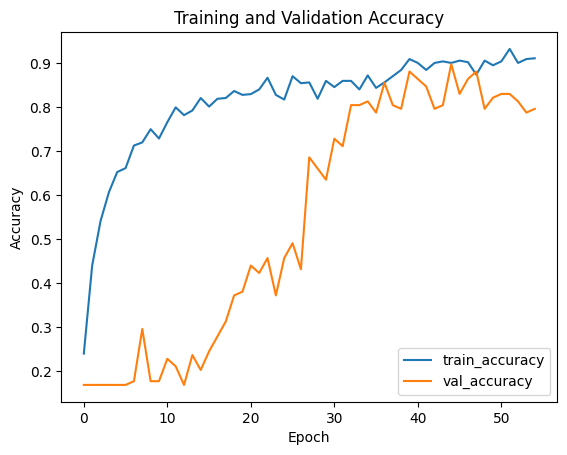

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, MaxPooling2D, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW  # Utilisation de AdamW
import os
import matplotlib.pyplot as plt

# Fonction pour créer un bloc résiduel
def residual_block(x, filters, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=3, strides=stride, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    # Adapter le shortcut si le stride n'est pas 1
    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Construire ResNet-18 avec Dropout
def ResNet18(input_shape=(224, 224, 3), num_classes=6):
    ''' Input Layer
        7x7 convolution, 64 filters, stride=2
        Batch Normalization
        ReLU
        MaxPooling 3x3, stride=2 '''
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    ''' Bloc 1
        Two residual blocks with 64 filters
        Convolution size: 3x3, stride=1 for both convolutions in each block
        Block output: same dimension as the input (56x56 if the input is 224x224)'''
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = Dropout(0.3)(x)

    ''' Block 2
        Two residual blocks with 128 filters
        Convolution size: 3x3, stride=2 for the first convolution
        of the first block to reduce the resolution to 28x28, then stride=1'''
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = Dropout(0.3)(x)

    ''' Block 3
        Two residual blocks with 256 filters
        Convolution size: 3x3, stride=2 for the first convolution
        of the first block to reduce the resolution to 14x14, then stride=1'''
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = Dropout(0.3)(x)

    ''' Bloc 4
        Two residual blocks with 512 filters
        Convolution size: 3x3, stride=2 for the first
        convolution of the first block to reduce the resolution to 7x7'''
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    ''' Output Layer
        Global Average Pooling: Reduces each 7x7 trait card to a single value
        Dense (Fully Connected) Layer:
        Number of neurons = number of classes (for example, 1000 for ImageNet)
        Softmax activation for final classification'''
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, outputs)
    return model

# Initialiser le modèle ResNet-18
model = ResNet18(input_shape=(224, 224, 3), num_classes=6)

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 224, 224

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=[0.7, 1.4],
    shear_range=0.5,
    brightness_range=[0.3, 1.5],
    horizontal_flip=True
)

# Générateur d'images pour la validation et le test
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compiler le modèle avec l'optimiseur AdamW
model.compile(optimizer=AdamW(learning_rate=0.0001, weight_decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
epochs = 55
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


Untils here we used/tried lots of regularization techninques, but not this one: Stochastic Depth. This technique mencionned "belongs to the family of noise-based regularization techniques" [paper: Regularization in ResNet with Stochastic Depth (Hayou.S & Fadhel.A)].


" DropConnect consists
of removing some neurons, resp. weights, at each iteration, SD randomly drops full layers, and
only updates the weights of the resulting subnetwork at each training iteration. As a result of this
mechanism, SD can be exclusively used with residual neural networks (ResNets)."

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/65


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 230s 9s/step - accuracy: 0.2025 - loss: 3.1634 - val_accuracy: 0.1695 - val_loss: 175.8940
Epoch 2/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.4758 - loss: 1.5435 - val_accuracy: 0.1949 - val_loss: 7.8363
Epoch 3/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.5929 - loss: 1.1457 - val_accuracy: 0.1695 - val_loss: 42.0153
Epoch 4/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.5976 - loss: 1.3069 - val_accuracy: 0.1695 - val_loss: 20.0927
Epoch 5/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.6436 - loss: 0.9760 - val_accuracy: 0.1949 - val_loss: 15.6867
Epoch 6/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - accuracy: 0.7244 - loss: 0.8217 - val_accuracy: 0.2119 - val_loss: 11.5147
Epoch 7/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.7380 - loss: 0.7445 - val_accuracy: 0.3051 - val_loss: 4.9669
Epoch 8/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.7725 - loss: 0.7382 - val_accuracy: 0.3220 - val_loss: 5.719

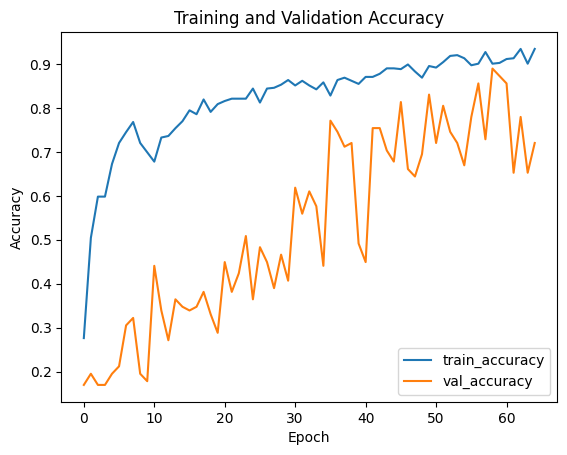

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, MaxPooling2D, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW  # Utilisation de AdamW
import os
import matplotlib.pyplot as plt

# Fonction pour créer un bloc résiduel
def residual_block(x, filters, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size=3, strides=stride, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    # Adapter le shortcut si le stride n'est pas 1
    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Construire ResNet-18 avec Dropout
def ResNet18(input_shape=(224, 224, 3), num_classes=6):
    # Input Layer
    # 7x7 convolution, 64 filters, stride=2
    # Batch Normalization
    # ReLU
    # MaxPooling 3x3, stride=2
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    # Bloc 1
    # Two residual blocks with 64 filters
    # Convolution size: 3x3, stride=1 for both convolutions in each block
    # Block output: same dimension as the input (56x56 if the input is 224x224)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = Dropout(0.3)(x)

    # Block 2
    # Two residual blocks with 128 filters
    # Convolution size: 3x3, stride=2 for the first convolution
    # of the first block to reduce the resolution to 28x28, then stride=1
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = Dropout(0.3)(x)

    # Block 3
    # Two residual blocks with 256 filters
    # Convolution size: 3x3, stride=2 for the first convolution
    # of the first block to reduce the resolution to 14x14, then stride=1
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = Dropout(0.3)(x)

    # Bloc 4
    # Two residual blocks with 512 filters
    # Convolution size: 3x3, stride=2 for the first
    # convolution of the first block to reduce the resolution to 7x7
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    # Output Layer
    # Global Average Pooling: Reduces each 7x7 trait card to a single value
    # Dense (Fully Connected) Layer:
    # Number of neurons = number of classes (for example, 1000 for ImageNet)
    # Softmax activation for final classification
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, outputs)
    return model

# Initialiser le modèle ResNet-18
model = ResNet18(input_shape=(224, 224, 3), num_classes=6)

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 64
img_height, img_width = 224, 224

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=[0.7, 1.4],
    shear_range=0.5,
    brightness_range=[0.3, 1.5],
    horizontal_flip=True
)

# Générateur d'images pour la validation et le test
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compiler le modèle avec l'optimiseur AdamW
model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
epochs = 65
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


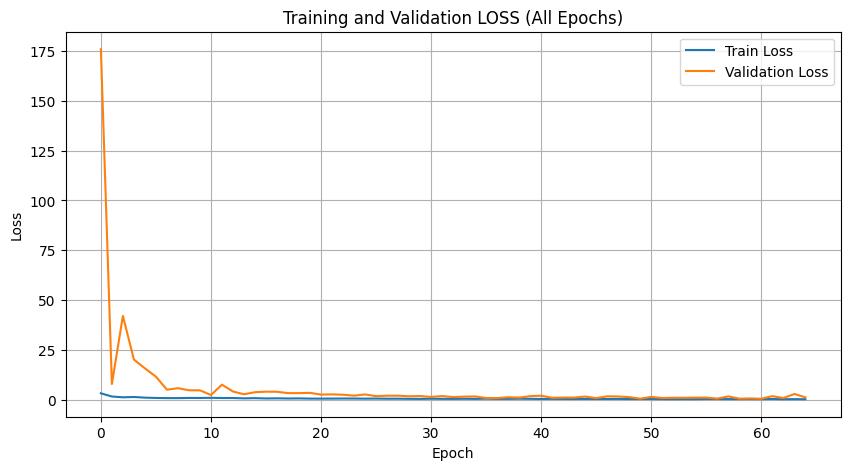

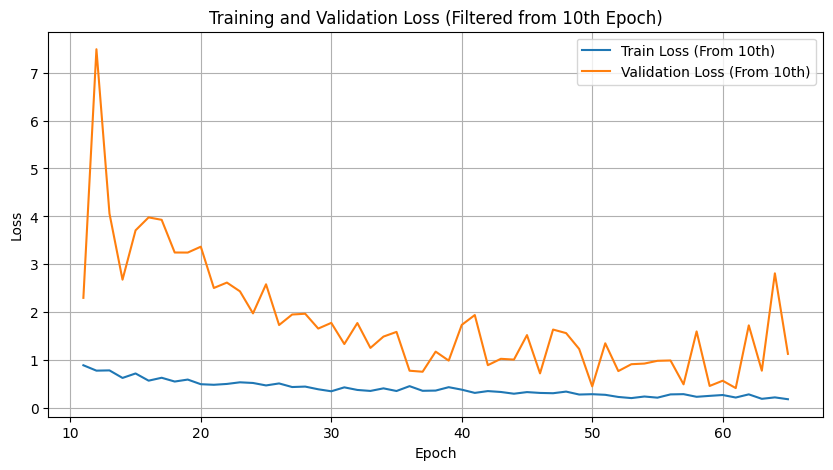

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """

9/9 ━━━━━━━━━━━━━━━━━━━━ 230s 9s/step - accuracy: 0.2025 - loss: 3.1634 - val_accuracy: 0.1695 - val_loss: 175.8940
Epoch 2/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.4758 - loss: 1.5435 - val_accuracy: 0.1949 - val_loss: 7.8363
Epoch 3/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.5929 - loss: 1.1457 - val_accuracy: 0.1695 - val_loss: 42.0153
Epoch 4/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.5976 - loss: 1.3069 - val_accuracy: 0.1695 - val_loss: 20.0927
Epoch 5/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.6436 - loss: 0.9760 - val_accuracy: 0.1949 - val_loss: 15.6867
Epoch 6/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - accuracy: 0.7244 - loss: 0.8217 - val_accuracy: 0.2119 - val_loss: 11.5147
Epoch 7/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.7380 - loss: 0.7445 - val_accuracy: 0.3051 - val_loss: 4.9669
Epoch 8/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.7725 - loss: 0.7382 - val_accuracy: 0.3220 - val_loss: 5.7191
Epoch 9/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.7131 - loss: 0.8261 - val_accuracy: 0.1949 - val_loss: 4.6817
Epoch 10/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 0.7212 - loss: 0.8012 - val_accuracy: 0.1780 - val_loss: 4.6521
Epoch 11/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - accuracy: 0.6699 - loss: 0.8931 - val_accuracy: 0.4407 - val_loss: 2.2997
Epoch 12/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.7291 - loss: 0.7808 - val_accuracy: 0.3390 - val_loss: 7.4887
Epoch 13/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.7209 - loss: 0.7860 - val_accuracy: 0.2712 - val_loss: 4.0589
Epoch 14/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.7540 - loss: 0.6288 - val_accuracy: 0.3644 - val_loss: 2.6795
Epoch 15/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.7754 - loss: 0.7219 - val_accuracy: 0.3475 - val_loss: 3.7089
Epoch 16/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.7914 - loss: 0.5717 - val_accuracy: 0.3390 - val_loss: 3.9793
Epoch 17/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.7788 - loss: 0.6324 - val_accuracy: 0.3475 - val_loss: 3.9284
Epoch 18/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - accuracy: 0.8273 - loss: 0.5534 - val_accuracy: 0.3814 - val_loss: 3.2463
Epoch 19/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.8145 - loss: 0.5946 - val_accuracy: 0.3305 - val_loss: 3.2451
Epoch 20/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.8137 - loss: 0.4976 - val_accuracy: 0.2881 - val_loss: 3.3675
Epoch 21/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.8297 - loss: 0.4858 - val_accuracy: 0.4492 - val_loss: 2.5060
Epoch 22/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - accuracy: 0.8099 - loss: 0.5033 - val_accuracy: 0.3814 - val_loss: 2.6186
Epoch 23/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.8241 - loss: 0.5374 - val_accuracy: 0.4237 - val_loss: 2.4360
Epoch 24/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.8202 - loss: 0.5235 - val_accuracy: 0.5085 - val_loss: 1.9759
Epoch 25/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.8504 - loss: 0.4723 - val_accuracy: 0.3644 - val_loss: 2.5828
Epoch 26/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - accuracy: 0.8175 - loss: 0.5139 - val_accuracy: 0.4831 - val_loss: 1.7330
Epoch 27/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.8591 - loss: 0.4388 - val_accuracy: 0.4492 - val_loss: 1.9519
Epoch 28/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.8520 - loss: 0.4481 - val_accuracy: 0.3898 - val_loss: 1.9686
Epoch 29/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.8574 - loss: 0.3918 - val_accuracy: 0.4661 - val_loss: 1.6591
Epoch 30/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - accuracy: 0.8784 - loss: 0.3502 - val_accuracy: 0.4068 - val_loss: 1.7778
Epoch 31/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.8699 - loss: 0.4321 - val_accuracy: 0.6186 - val_loss: 1.3359
Epoch 32/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.8563 - loss: 0.3779 - val_accuracy: 0.5593 - val_loss: 1.7745
Epoch 33/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.8785 - loss: 0.3574 - val_accuracy: 0.6102 - val_loss: 1.2551
Epoch 34/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - accuracy: 0.8551 - loss: 0.4113 - val_accuracy: 0.5763 - val_loss: 1.4913
Epoch 35/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - accuracy: 0.8749 - loss: 0.3559 - val_accuracy: 0.4407 - val_loss: 1.5895
Epoch 36/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.8237 - loss: 0.4572 - val_accuracy: 0.7712 - val_loss: 0.7791
Epoch 37/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - accuracy: 0.8521 - loss: 0.3601 - val_accuracy: 0.7458 - val_loss: 0.7580
Epoch 38/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - accuracy: 0.8756 - loss: 0.3648 - val_accuracy: 0.7119 - val_loss: 1.1778
Epoch 39/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.8579 - loss: 0.4357 - val_accuracy: 0.7203 - val_loss: 0.9903
Epoch 40/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.8614 - loss: 0.3839 - val_accuracy: 0.4915 - val_loss: 1.7352
Epoch 41/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.8809 - loss: 0.3165 - val_accuracy: 0.4492 - val_loss: 1.9412
Epoch 42/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.8843 - loss: 0.3541 - val_accuracy: 0.7542 - val_loss: 0.8951
Epoch 43/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.8770 - loss: 0.3355 - val_accuracy: 0.7542 - val_loss: 1.0278
Epoch 44/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.9054 - loss: 0.2993 - val_accuracy: 0.7034 - val_loss: 1.0110
Epoch 45/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.8887 - loss: 0.3331 - val_accuracy: 0.6780 - val_loss: 1.5228
Epoch 46/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.8796 - loss: 0.3157 - val_accuracy: 0.8136 - val_loss: 0.7237
Epoch 47/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.9025 - loss: 0.3095 - val_accuracy: 0.6610 - val_loss: 1.6382
Epoch 48/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.8718 - loss: 0.3436 - val_accuracy: 0.6441 - val_loss: 1.5640
Epoch 49/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.8948 - loss: 0.2823 - val_accuracy: 0.6949 - val_loss: 1.2334
Epoch 50/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.8989 - loss: 0.2894 - val_accuracy: 0.8305 - val_loss: 0.4523
Epoch 51/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.8891 - loss: 0.2764 - val_accuracy: 0.7203 - val_loss: 1.3516
Epoch 52/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.9201 - loss: 0.2317 - val_accuracy: 0.8051 - val_loss: 0.7716
Epoch 53/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 247ms/step - accuracy: 0.9282 - loss: 0.2080 - val_accuracy: 0.7458 - val_loss: 0.9151
Epoch 54/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.9179 - loss: 0.2409 - val_accuracy: 0.7203 - val_loss: 0.9285
Epoch 55/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.9207 - loss: 0.2169 - val_accuracy: 0.6695 - val_loss: 0.9858
Epoch 56/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.8985 - loss: 0.2851 - val_accuracy: 0.7797 - val_loss: 0.9930
Epoch 57/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.8930 - loss: 0.2902 - val_accuracy: 0.8559 - val_loss: 0.4949
Epoch 58/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.9193 - loss: 0.2349 - val_accuracy: 0.7288 - val_loss: 1.5994
Epoch 59/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.9103 - loss: 0.2544 - val_accuracy: 0.8898 - val_loss: 0.4612
Epoch 60/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.9074 - loss: 0.2722 - val_accuracy: 0.8729 - val_loss: 0.5704
Epoch 61/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.9273 - loss: 0.2197 - val_accuracy: 0.8559 - val_loss: 0.4169
Epoch 62/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.9110 - loss: 0.2858 - val_accuracy: 0.6525 - val_loss: 1.7257
Epoch 63/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.9331 - loss: 0.1927 - val_accuracy: 0.7797 - val_loss: 0.7796
Epoch 64/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.9118 - loss: 0.2228 - val_accuracy: 0.6525 - val_loss: 2.8114
Epoch 65/65
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.9317 - loss: 0.1844 - val_accuracy: 0.7203 - val_loss: 1.1308
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6562 - ss: 1.4189
"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Graphique 2 : À partir de la 10ème occurrence
start_index = 10
filtered_loss = history_dict[' loss'][start_index:] if len(history_dict[' loss']) > start_index else []
filtered_val_loss = history_dict['val_loss'][start_index:] if len(history_dict['val_loss']) > start_index else []

if filtered_loss and filtered_val_loss:
    # Ajuster les indices de l'axe x pour commencer à 10
    epochs = list(range(start_index + 1, start_index + 1 + len(filtered_loss)))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, filtered_loss, label='Train Loss (From 10th)')
    plt.plot(epochs, filtered_val_loss, label='Validation Loss (From 10th)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss (Filtered from 10th Epoch)')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
else:
    print(" ... ")

#model H, last one

Found 565 images belonging to 6 classes.
Found 118 images belonging to 6 classes.
Found 128 images belonging to 6 classes.
Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.2637 - loss: 2.9058 - val_accuracy: 0.1695 - val_loss: 128.1572
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.3975 - loss: 1.8866 - val_accuracy: 0.1695 - val_loss: 370.1067
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 316ms/step - accuracy: 0.4966 - loss: 1.3577 - val_accuracy: 0.1695 - val_loss: 142.6234
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.5979 - loss: 1.0842 - val_accuracy: 0.1695 - val_loss: 96.8195
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.6167 - loss: 1.0669 - val_accuracy: 0.1695 - val_loss: 64.4664
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.6824 - loss: 0.9132 - val_accuracy: 0.1695 - val_loss: 9.2806
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.7052 - loss: 0.9294 - val_accuracy: 0

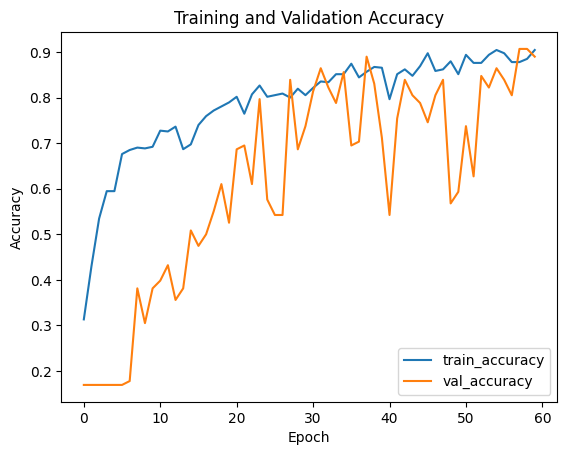

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, MaxPooling2D, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW
import os
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import random


# Fonction pour créer un bloc résiduel avec Stochastic Depth
def residual_block(x, filters, stride=1, survival_prob=1.0, training=True):
    shortcut = x

    # Première convolution
    x = Conv2D(filters, kernel_size=3, strides=stride, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Deuxième convolution
    x = Conv2D(filters, kernel_size=3, strides=1, padding="same")(x)
    x = BatchNormalization()(x)

    # Adapter le shortcut si le stride n'est pas 1
    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding="same")(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Appliquer Stochastic Depth (pendant l'entraînement uniquement)
    if training and survival_prob < 1.0:
        if random.uniform(0, 1) >= survival_prob:
            # Si le bloc est "drop", passe directement le shortcut
            return ReLU()(shortcut)

    # Si le bloc n'est pas "drop", additionner shortcut + transformation
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x


# Construire ResNet-18 avec Dropout et Stochastic Depth
def ResNet18(input_shape=(224, 224, 3), num_classes=6, survival_prob=0.9):
    inputs = Input(shape=input_shape)

    # Input Layer
    x = Conv2D(64, kernel_size=7, strides=2, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding="same")(x)

    # Bloc 1
    x = residual_block(x, 64, survival_prob=survival_prob)
    x = residual_block(x, 64, survival_prob=survival_prob)
    x = Dropout(0.3)(x)

    # Bloc 2
    x = residual_block(x, 128, stride=2, survival_prob=survival_prob)
    x = residual_block(x, 128, survival_prob=survival_prob)
    x = Dropout(0.3)(x)

    # Bloc 3
    x = residual_block(x, 256, stride=2, survival_prob=survival_prob)
    x = residual_block(x, 256, survival_prob=survival_prob)
    x = Dropout(0.3)(x)

    # Bloc 4
    x = residual_block(x, 512, stride=2, survival_prob=survival_prob)
    x = residual_block(x, 512, survival_prob=survival_prob)

    # Output Layer
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs, outputs)
    return model


# Initialiser le modèle avec Stochastic Depth
model = ResNet18(input_shape=(224, 224, 3), num_classes=6, survival_prob=0.9)

# Chemins des dossiers de données
train_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/train'
val_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/validation'
test_dir = '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test'

# Paramètres du modèle
batch_size = 32
img_height, img_width = 224, 224

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=[0.7, 1.4],
    shear_range=0.5,
    brightness_range=[0.3, 1.5],
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compiler le modèle avec AdamW
model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
epochs = 60
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Évaluer sur le set de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Afficher les courbes d'entraînement
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


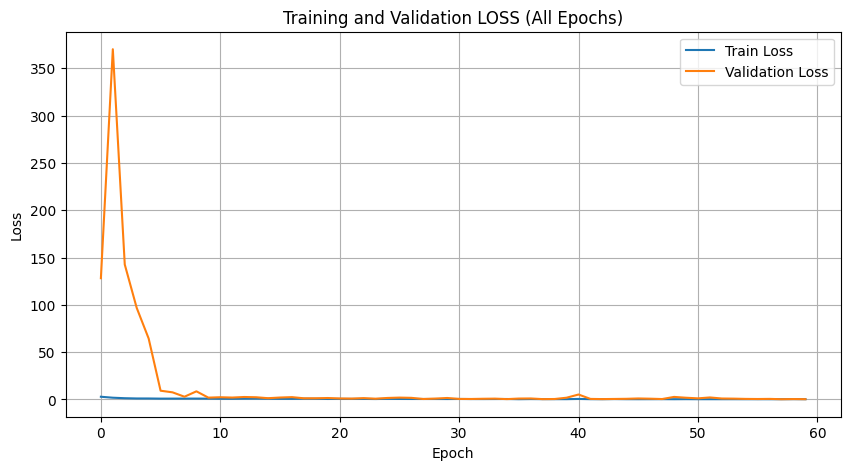

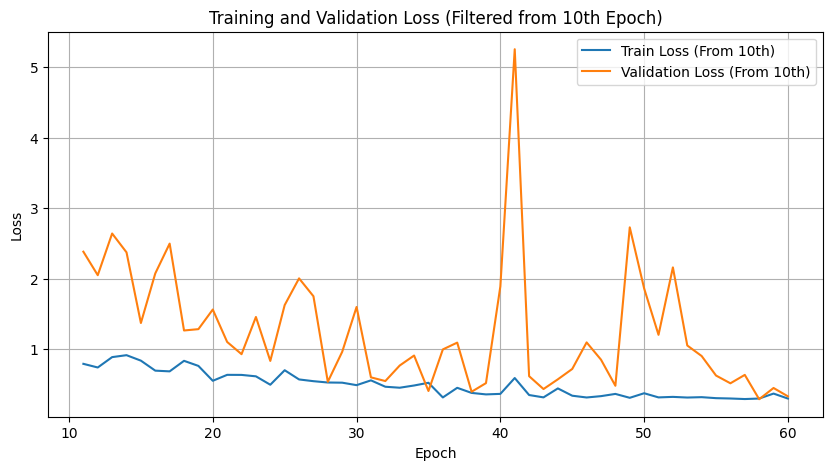

In [ ]:
# @title
import matplotlib.pyplot as plt
import re

# Exemple de texte d'entrée
log_text = """


Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.2637 - loss: 2.9058 - val_accuracy: 0.1695 - val_loss: 128.1572
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.3975 - loss: 1.8866 - val_accuracy: 0.1695 - val_loss: 370.1067
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 316ms/step - accuracy: 0.4966 - loss: 1.3577 - val_accuracy: 0.1695 - val_loss: 142.6234
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.5979 - loss: 1.0842 - val_accuracy: 0.1695 - val_loss: 96.8195
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.6167 - loss: 1.0669 - val_accuracy: 0.1695 - val_loss: 64.4664
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.6824 - loss: 0.9132 - val_accuracy: 0.1695 - val_loss: 9.2806
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.7052 - loss: 0.9294 - val_accuracy: 0.1780 - val_loss: 7.5680
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.6724 - loss: 0.9429 - val_accuracy: 0.3814 - val_loss: 2.9355
Epoch 9/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.6783 - loss: 0.9529 - val_accuracy: 0.3051 - val_loss: 8.6310
Epoch 10/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 318ms/step - accuracy: 0.6926 - loss: 0.9078 - val_accuracy: 0.3814 - val_loss: 1.9690
Epoch 11/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.7315 - loss: 0.7942 - val_accuracy: 0.3983 - val_loss: 2.3849
Epoch 12/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.7497 - loss: 0.7424 - val_accuracy: 0.4322 - val_loss: 2.0517
Epoch 13/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.7310 - loss: 0.8896 - val_accuracy: 0.3559 - val_loss: 2.6430
Epoch 14/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.6995 - loss: 0.9171 - val_accuracy: 0.3814 - val_loss: 2.3757
Epoch 15/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.6870 - loss: 0.8394 - val_accuracy: 0.5085 - val_loss: 1.3735
Epoch 16/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.7184 - loss: 0.6976 - val_accuracy: 0.4746 - val_loss: 2.0767
Epoch 17/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.7566 - loss: 0.6875 - val_accuracy: 0.5000 - val_loss: 2.4998
Epoch 18/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.7450 - loss: 0.8369 - val_accuracy: 0.5508 - val_loss: 1.2674
Epoch 19/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.7623 - loss: 0.7648 - val_accuracy: 0.6102 - val_loss: 1.2863
Epoch 20/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.8144 - loss: 0.5538 - val_accuracy: 0.5254 - val_loss: 1.5646
Epoch 21/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.7928 - loss: 0.6381 - val_accuracy: 0.6864 - val_loss: 1.1045
Epoch 22/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.7549 - loss: 0.6372 - val_accuracy: 0.6949 - val_loss: 0.9313
Epoch 23/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.7805 - loss: 0.6170 - val_accuracy: 0.6102 - val_loss: 1.4588
Epoch 24/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 298ms/step - accuracy: 0.8160 - loss: 0.4978 - val_accuracy: 0.7966 - val_loss: 0.8356
Epoch 25/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.7784 - loss: 0.7035 - val_accuracy: 0.5763 - val_loss: 1.6278
Epoch 26/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.7991 - loss: 0.5729 - val_accuracy: 0.5424 - val_loss: 2.0065
Epoch 27/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.7997 - loss: 0.5482 - val_accuracy: 0.5424 - val_loss: 1.7532
Epoch 28/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.8193 - loss: 0.5294 - val_accuracy: 0.8390 - val_loss: 0.5394
Epoch 29/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.7944 - loss: 0.5269 - val_accuracy: 0.6864 - val_loss: 0.9646
Epoch 30/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - accuracy: 0.8163 - loss: 0.4919 - val_accuracy: 0.7373 - val_loss: 1.6009
Epoch 31/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.8052 - loss: 0.5599 - val_accuracy: 0.8136 - val_loss: 0.6024
Epoch 32/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8186 - loss: 0.4694 - val_accuracy: 0.8644 - val_loss: 0.5502
Epoch 33/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.8418 - loss: 0.4554 - val_accuracy: 0.8220 - val_loss: 0.7703
Epoch 34/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 0.8199 - loss: 0.4870 - val_accuracy: 0.7881 - val_loss: 0.9121
Epoch 35/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.8242 - loss: 0.5256 - val_accuracy: 0.8559 - val_loss: 0.4092
Epoch 36/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.9031 - loss: 0.3176 - val_accuracy: 0.6949 - val_loss: 0.9986
Epoch 37/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.8424 - loss: 0.4542 - val_accuracy: 0.7034 - val_loss: 1.0952
Epoch 38/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.8498 - loss: 0.3818 - val_accuracy: 0.8898 - val_loss: 0.3984
Epoch 39/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.8647 - loss: 0.3608 - val_accuracy: 0.8305 - val_loss: 0.5207
Epoch 40/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.8769 - loss: 0.3681 - val_accuracy: 0.7119 - val_loss: 1.8928
Epoch 41/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.8014 - loss: 0.5929 - val_accuracy: 0.5424 - val_loss: 5.2571
Epoch 42/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 0.8655 - loss: 0.3518 - val_accuracy: 0.7542 - val_loss: 0.6192
Epoch 43/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.8898 - loss: 0.3184 - val_accuracy: 0.8390 - val_loss: 0.4367
Epoch 44/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.8395 - loss: 0.4456 - val_accuracy: 0.8051 - val_loss: 0.5747
Epoch 45/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.8697 - loss: 0.3420 - val_accuracy: 0.7881 - val_loss: 0.7217
Epoch 46/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 318ms/step - accuracy: 0.9004 - loss: 0.3170 - val_accuracy: 0.7458 - val_loss: 1.0982
Epoch 47/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.8732 - loss: 0.3360 - val_accuracy: 0.8051 - val_loss: 0.8534
Epoch 48/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.8669 - loss: 0.3676 - val_accuracy: 0.8390 - val_loss: 0.4831
Epoch 49/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.9090 - loss: 0.3123 - val_accuracy: 0.5678 - val_loss: 2.7300
Epoch 50/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.8651 - loss: 0.3771 - val_accuracy: 0.5932 - val_loss: 1.8638
Epoch 51/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 305ms/step - accuracy: 0.8885 - loss: 0.3181 - val_accuracy: 0.7373 - val_loss: 1.2057
Epoch 52/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.8788 - loss: 0.3255 - val_accuracy: 0.6271 - val_loss: 2.1624
Epoch 53/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 303ms/step - accuracy: 0.8926 - loss: 0.3162 - val_accuracy: 0.8475 - val_loss: 1.0545
Epoch 54/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.9029 - loss: 0.3215 - val_accuracy: 0.8220 - val_loss: 0.9050
Epoch 55/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 0.8996 - loss: 0.3074 - val_accuracy: 0.8644 - val_loss: 0.6281
Epoch 56/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 316ms/step - accuracy: 0.9096 - loss: 0.3026 - val_accuracy: 0.8390 - val_loss: 0.5182
Epoch 57/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.8884 - loss: 0.2948 - val_accuracy: 0.8051 - val_loss: 0.6375
Epoch 58/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/step - accuracy: 0.8950 - loss: 0.3020 - val_accuracy: 0.9068 - val_loss: 0.2923
Epoch 59/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.8809 - loss: 0.3723 - val_accuracy: 0.9068 - val_loss: 0.4518
Epoch 60/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.8952 - loss: 0.3018 - val_accuracy: 0.8898 - val_loss: 0.3329
"""


# Initialiser les dictionnaires pour stocker les valeurs de loss et val_loss
history_dict = {' loss': [], 'val_loss': []}

# Extraire les valeurs de loss et val_loss avec des expressions régulières
for match in re.finditer(r' loss: ([0-9]+\.[0-9]+)', log_text):
    train_loss = float(match.group(1))
    history_dict[' loss'].append(train_loss)

for match in re.finditer(r'val_loss: ([0-9]+\.[0-9]+)', log_text):
    val_loss = float(match.group(1))
    history_dict['val_loss'].append(val_loss)

# Graphique 1 : Toutes les valeurs
plt.figure(figsize=(10, 5))
plt.plot(history_dict[' loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LOSS (All Epochs)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Graphique 2 : À partir de la 10ème occurrence
start_index = 10
filtered_loss = history_dict[' loss'][start_index:] if len(history_dict[' loss']) > start_index else []
filtered_val_loss = history_dict['val_loss'][start_index:] if len(history_dict['val_loss']) > start_index else []

if filtered_loss and filtered_val_loss:
    # Ajuster les indices de l'axe x pour commencer à 10
    epochs = list(range(start_index + 1, start_index + 1 + len(filtered_loss)))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, filtered_loss, label='Train Loss (From 10th)')
    plt.plot(epochs, filtered_val_loss, label='Validation Loss (From 10th)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss (Filtered from 10th Epoch)')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
else:
    print(" ... ")

# Save the model:

In [ ]:
# Sauvegarder le modèle au format HDF5 (ou TensorFlow SavedModel)
model.save('/content/gdrive/MyDrive/birds/ResNet18_StochDepth_B16E60.h5')  # Sauvegarde dans Google Drive
print("Modèle sauvegardé sous le nom 'ResNet18_model.h5'")


Modèle sauvegardé sous le nom 'ResNet18_model.h5'


# Charge the model:

In [ ]:
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model = load_model('/content/gdrive/MyDrive/birds/ResNet18_model.h5')
print("Modèle chargé avec succès !")


Modèle chargé avec succès !


# Test the model with 6 pictures from test set:

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


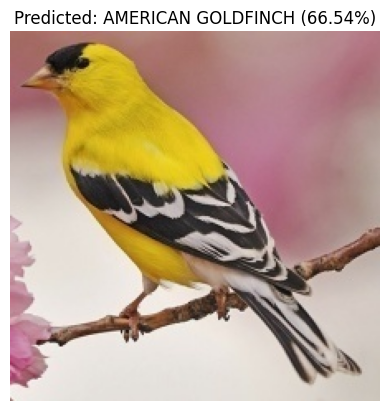

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


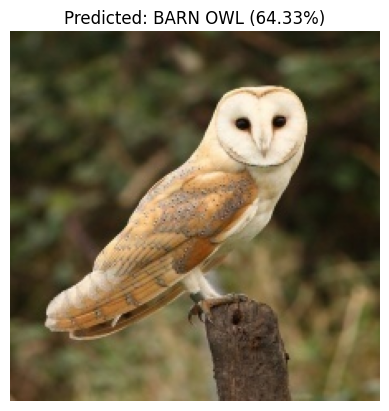

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


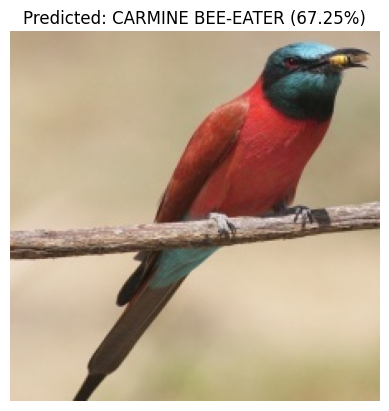

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


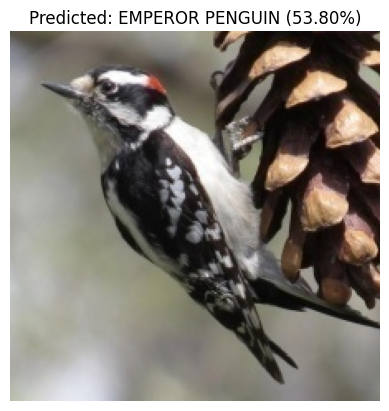

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


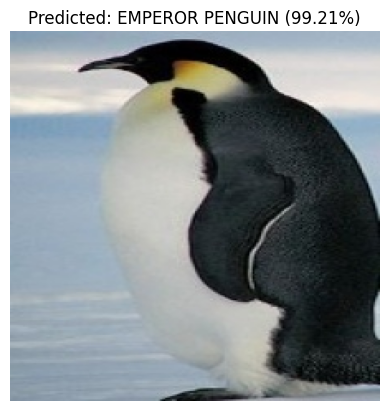

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


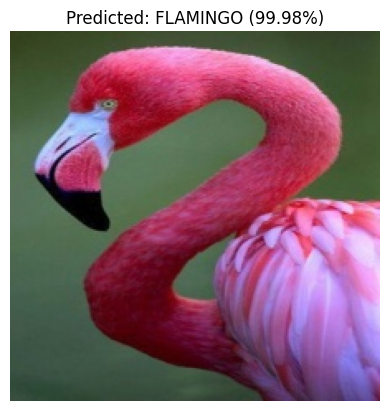

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Charger et préparer une image pour la prédiction
def load_and_prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normaliser l'image
    return img, img_array

# Obtenir les noms des classes
class_names = list(train_generator.class_indices.keys())

# Chemins des images de test (à ajuster pour chaque classe)
test_images_paths = [
    '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test/AMERICAN GOLDFINCH/014.jpg',  # Remplacez par un exemple d'image pour chaque classe
    '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test/BARN OWL/023.jpg',
    '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test/CARMINE BEE-EATER/047.jpg',
    '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test/DOWNY WOODPECKER/006.jpg',
    '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test/EMPEROR PENGUIN/002.jpg',
    '/content/gdrive/MyDrive/birds/Bird Speciees Dataset/test/FLAMINGO/027.jpg'
]

# Effectuer des prédictions et afficher les résultats
for img_path in test_images_paths:
    img, img_array = load_and_prepare_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Affichage de l'image et de la prédiction
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence * 100:.2f}%)")
    plt.show()
